Section A:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import warnings
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from ipywidgets import interact, widgets
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

libraries beyond those presented in the exercises:
from scipy.stats import ttest_ind
import warnings
from ipywidgets import interact, widgets
from ucimlrepo import fetch_ucirepo
from scipy import stats
from sklearn.inspection import permutation_importance

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
wine_quality = fetch_ucirepo(id=186)

# Get the features and targets as pandas dataframes
X = wine_quality.data.features
y = wine_quality.data.targets

# Print metadata
print(wine_quality.metadata)

# Print variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

helping you understand the structure and content of the data:

The code begins with basic data inspection using .head() and .tail() to display the first and last 10 rows of the dataset. This helps understand the structure and get a sense of the data's content.

table that shows us the first 10 rows of the wine and quality data and showing all the features:

In [4]:
print(X.head(10))

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [5]:
print(y.head(10))

   quality
0        5
1        5
2        5
3        6
4        5
5        5
6        5
7        7
8        7
9        5


table that shows us the last 10 rows of the wine and quality data and showing all the features:

In [6]:
print(X.tail(10))

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6487            6.8             0.220         0.36            1.20      0.052   
6488            4.9             0.235         0.27           11.75      0.030   
6489            6.1             0.340         0.29            2.20      0.036   
6490            5.7             0.210         0.32            0.90      0.038   
6491            6.5             0.230         0.38            1.30      0.032   
6492            6.2             0.210         0.29            1.60      0.039   
6493            6.6             0.320         0.36            8.00      0.047   
6494            6.5             0.240         0.19            1.20      0.041   
6495            5.5             0.290         0.30            1.10      0.022   
6496            6.0             0.210         0.38            0.80      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
6487                 38.0      

In [7]:
print(y.tail(10))

      quality
6487        5
6488        6
6489        6
6490        6
6491        5
6492        6
6493        5
6494        6
6495        7
6496        6


tables to see if there is missing data and see if we need to do preproccesing:

In [8]:
missing_values_wine = X.isnull().sum()
print("Number of missing values in each feature in wine table:")
print(missing_values_wine)

Number of missing values in each feature in wine table:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [9]:
missing_values_quality = y.isnull().sum()
print("Number of missing values in each feature in quality table:")
print(missing_values_quality)

Number of missing values in each feature in quality table:
quality    0
dtype: int64


generates summary statistics for the dataset, such as mean, standard deviation, and percentiles, which is useful for understanding the distribution of the data:

In [10]:
X.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801  
std       0.160787     0.148806     1.192712  
min       2.720000     0.220000     8.000000  
25%       3.110000     0.430000     9.500000  
50%       3.210000     0.510000    10.300000  
75%       3.320000     0.600000    11.300000  
max       4.010000     2.000000    14.900000

In [11]:
y.describe()

quality
count  6497.000000
mean      5.818378
std       0.873255
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000

 What is the distribution of wine quality scores?

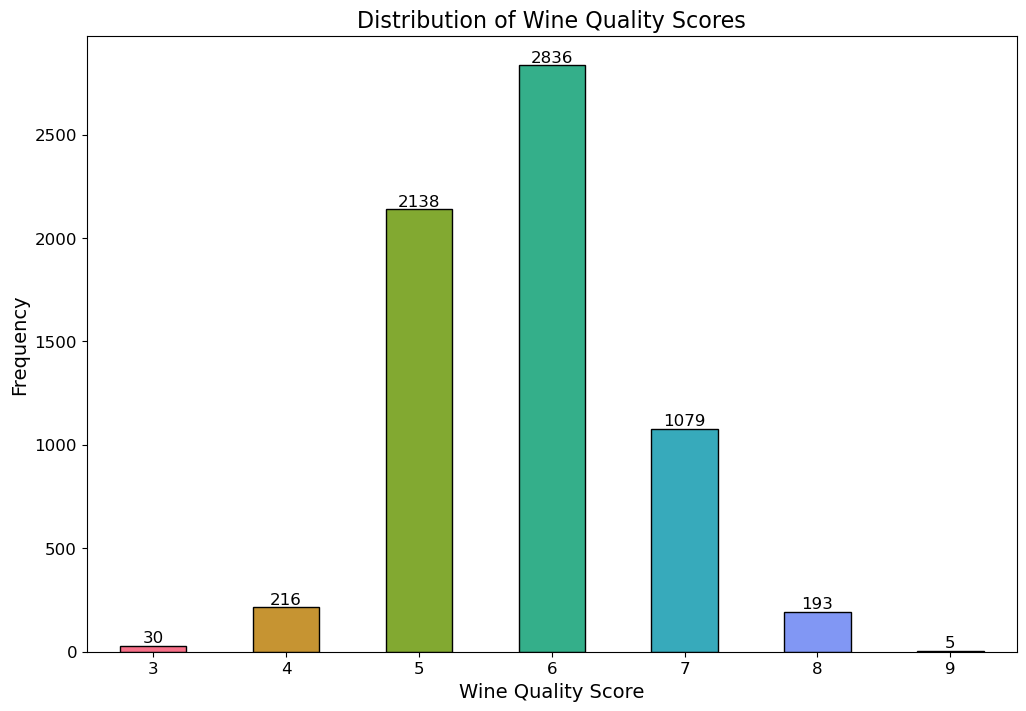

In [12]:
y_series = y if isinstance(y, pd.Series) else y['quality']
colors = sns.color_palette('husl', len(y_series.unique()))

plt.figure(figsize=(12, 8))
bar_plot = y_series.value_counts().sort_index().plot(kind='bar', color=colors, edgecolor='black')

plt.xlabel('Wine Quality Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Wine Quality Scores', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
bar_plot.bar_label(bar_plot.containers[0], label_type='edge', fontsize=12)

plt.show()

This bar plot displays the frequency of each wine quality score in the dataset.
It helps you see how the wine samples are distributed across different quality ratings (typically on a scale from 3 to 8).
From this, you can quickly identify if the dataset is imbalanced (e.g., many samples are rated 5 or 6), which might necessitate techniques to balance the classes.

How do different physicochemical properties correlate with wine quality?

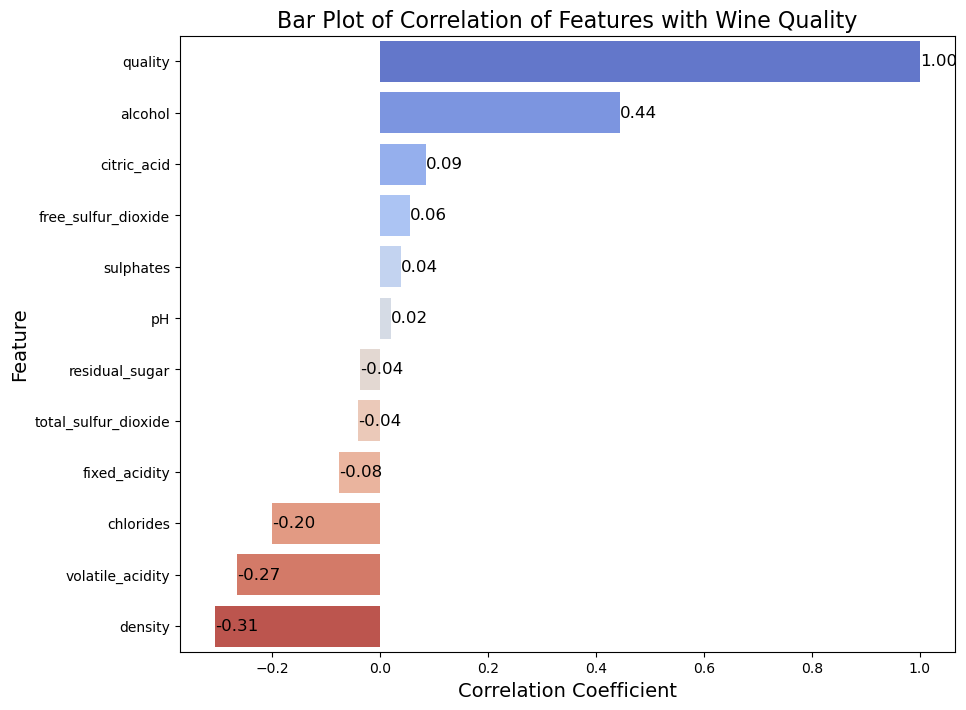

In [13]:
data = X.copy()
data['quality'] = y if isinstance(y, pd.Series) else y['quality']

correlation_matrix = data.corr()
correlations_with_quality = correlation_matrix['quality'].sort_values(ascending=False)
correlation_values = correlations_with_quality.values.flatten()
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x=correlation_values, y=correlations_with_quality.index, palette='coolwarm')

for i in range(len(correlations_with_quality)):
    bar_plot.text(correlation_values[i], i, f'{correlation_values[i]:.2f}', 
                  va='center', ha='left', fontsize=12, color='black')

plt.title('Bar Plot of Correlation of Features with Wine Quality', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

This bar plot visualizes the strength and direction of the linear relationship between each physicochemical property and the wine quality.
Positive values indicate a positive correlation (as the feature increases, wine quality tends to increase), while negative values indicate a negative correlation.
For example, alcohol might have a strong positive correlation, indicating that wines with higher alcohol content tend to be rated higher.

What are the distributions of individual physicochemical properties?

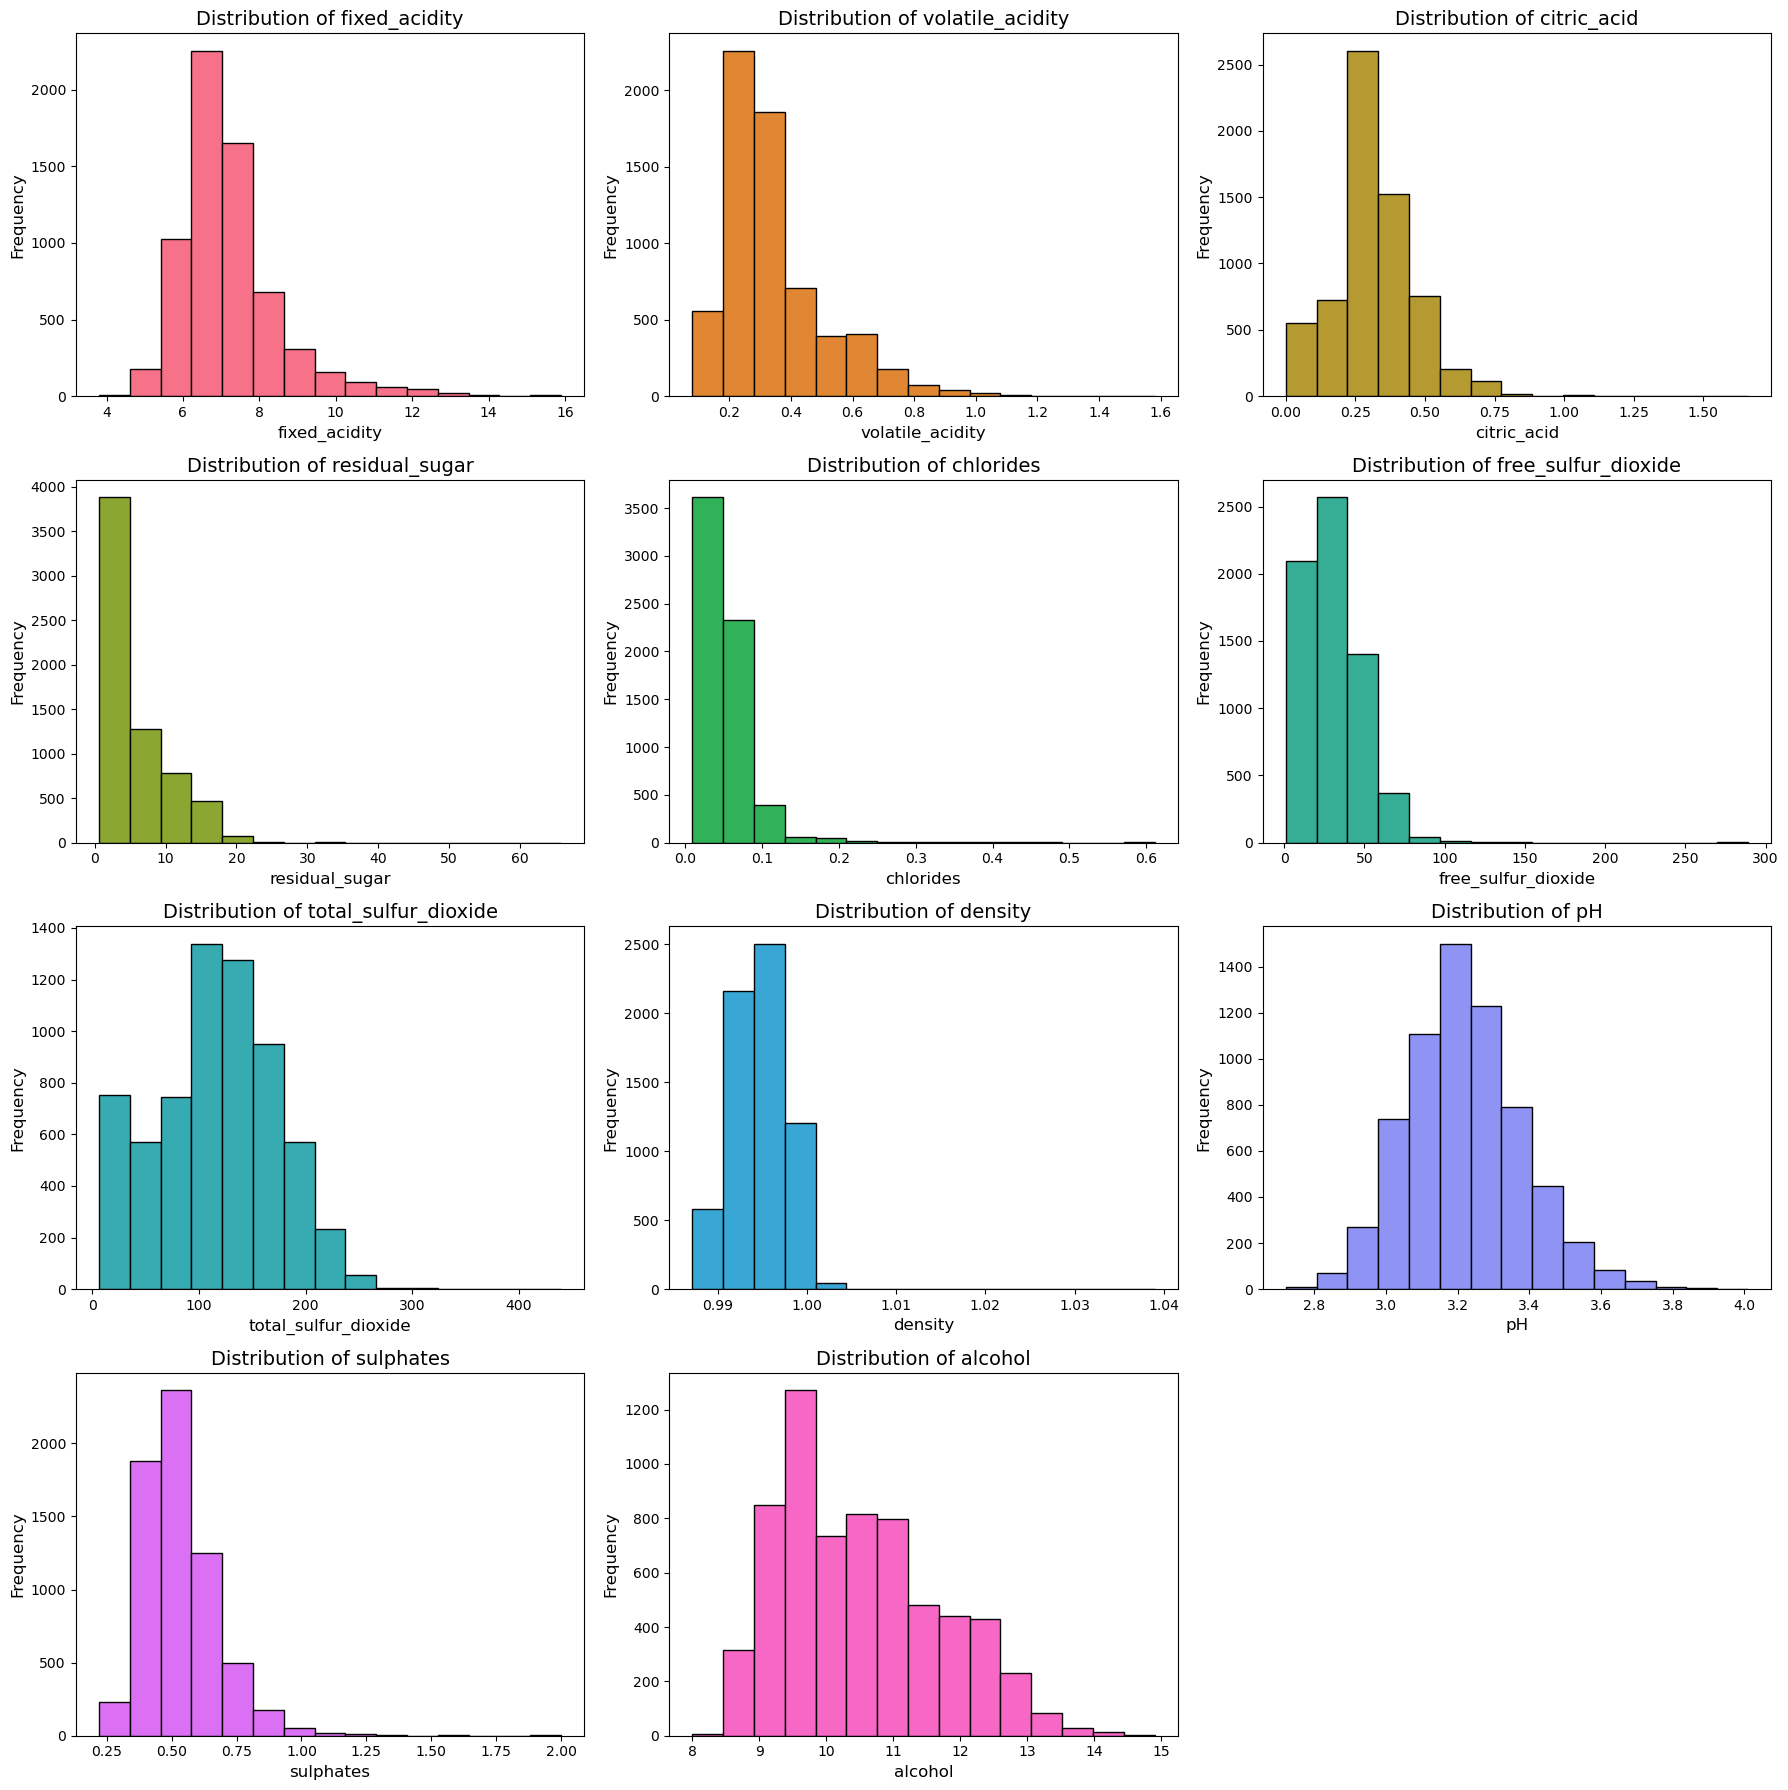

In [14]:
colors = sns.color_palette('husl', len(X.columns))

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))
axes = axes.flatten() 

for i, column in enumerate(X.columns):
    X[column].plot.hist(bins=15, ax=axes[i], color=colors[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=0, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

These histograms show the distribution of each physicochemical property (like pH, alcohol, density) in the dataset.
You can see whether the data is normally distributed, skewed, or has outliers.
This is useful for understanding the range and central tendency of each feature, which can inform preprocessing decisions like scaling or outlier treatment.

How are the physicochemical properties related to each other and to wine quality?

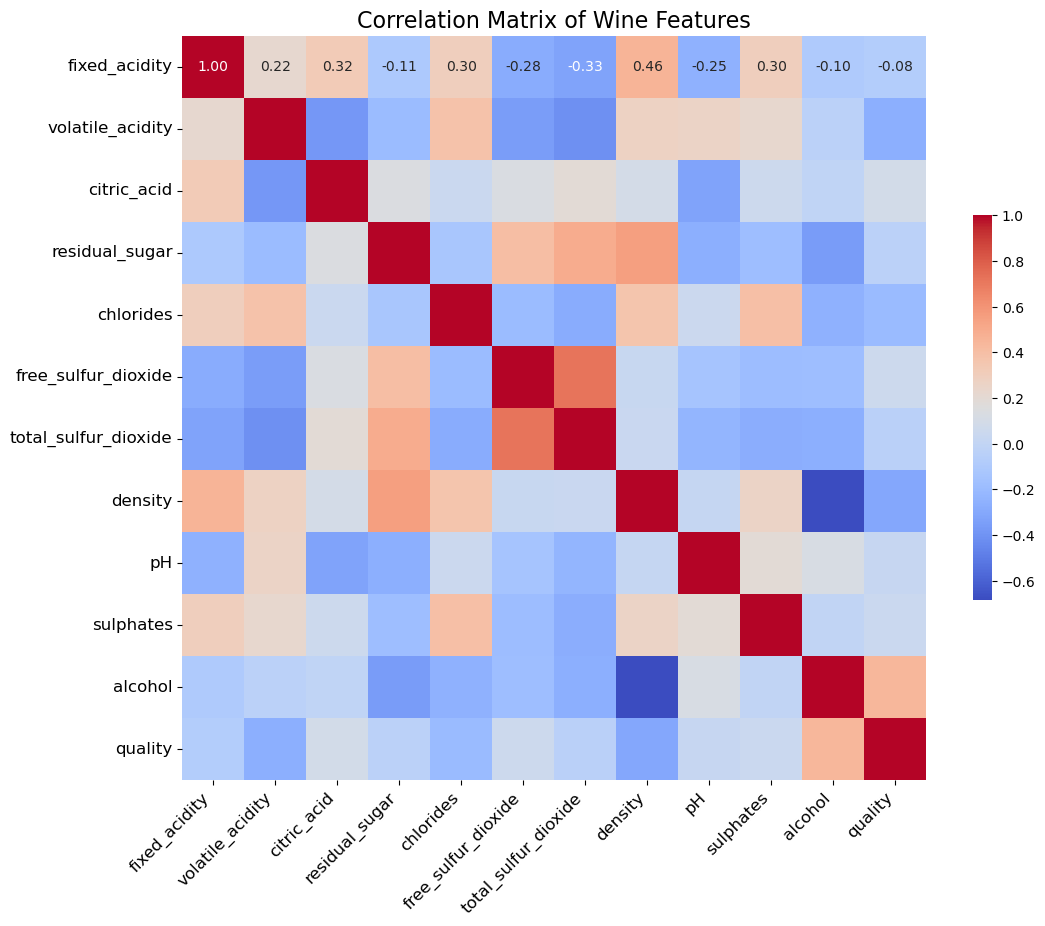

In [15]:
data = X.copy()
data['quality'] = y

correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix of Wine Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

The heatmap visualizes the pairwise correlation between all features in the dataset, including the target variable (wine quality).
Darker colors indicate stronger correlations, whether positive or negative.
This helps identify features that are highly correlated with each other or with the target variable, which might influence feature selection or dimensionality reduction decisions.

 How do the most important physicochemical properties interact with each other and with wine quality?

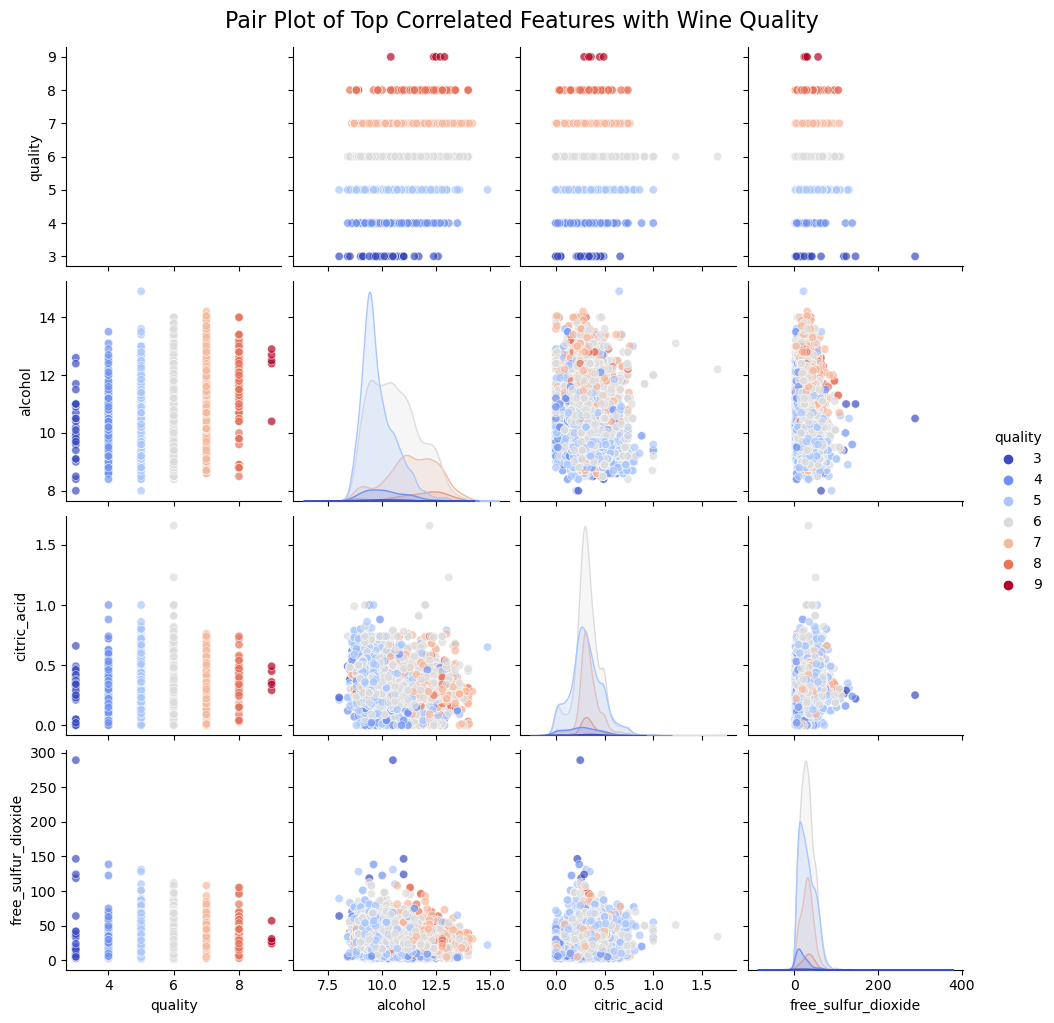

In [16]:
warnings.filterwarnings('ignore', category=FutureWarning)

correlation_matrix = data.corr()
correlations_with_quality = correlation_matrix['quality'].sort_values(ascending=False)
top_features = correlations_with_quality.index[:4]
sns.pairplot(data, vars=top_features, hue='quality', palette='coolwarm', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Top Correlated Features with Wine Quality', y=1.02, fontsize=16)
plt.show()


The pair plot shows scatter plots for each pair of the top four features that are most correlated with wine quality.
It includes density plots on the diagonal, showing the distribution of each feature.
This helps visualize how these top features interact with each other and with wine quality, identifying patterns or clusters that could be informative for predictive modeling.

How does the distribution of volatile acidity diffrent over different wine quality scores?

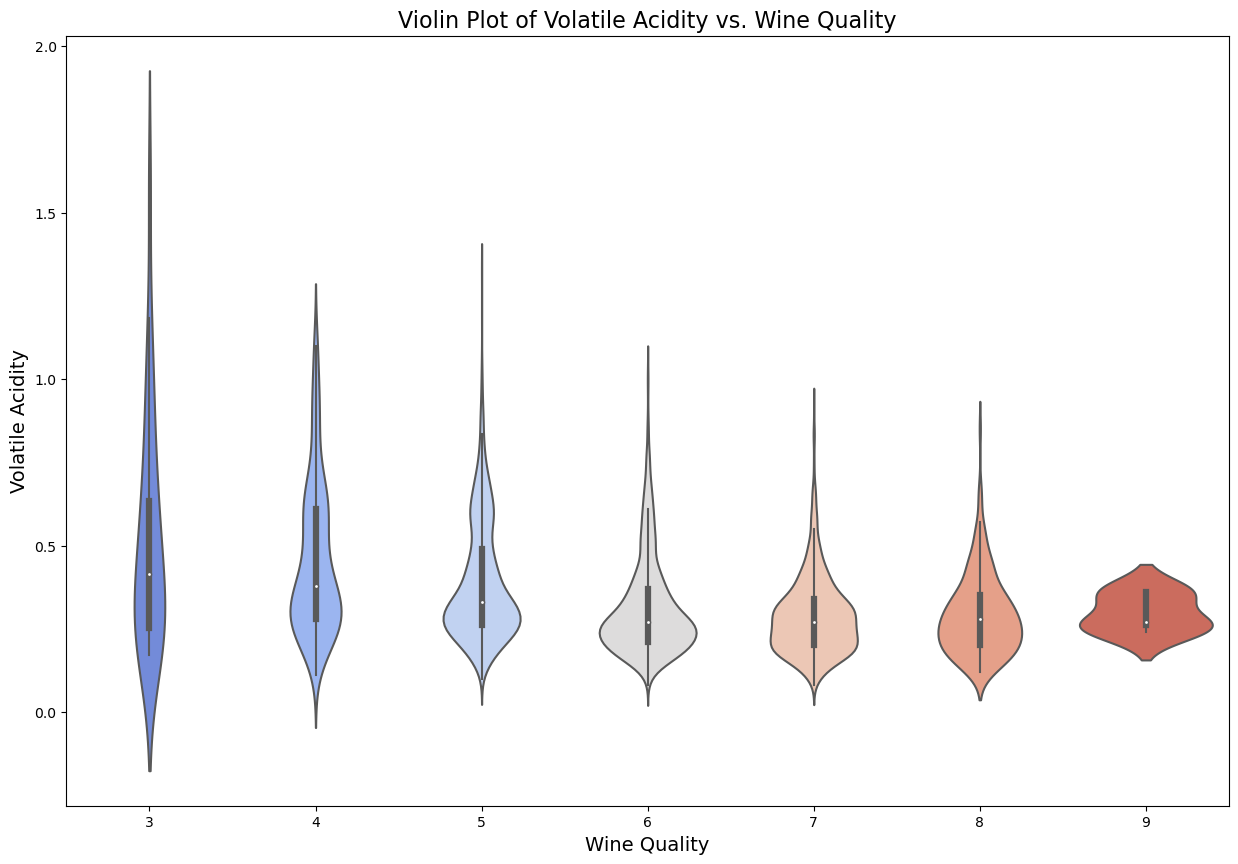

In [17]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='quality', y='volatile_acidity', data=data, palette='coolwarm')
plt.title('Violin Plot of Volatile Acidity vs. Wine Quality', fontsize=16)
plt.xlabel('Wine Quality', fontsize=14)
plt.ylabel('Volatile Acidity', fontsize=14)
plt.show()

The violin plot displays the distribution of volatile acidity across different wine quality levels.
Unlike a boxplot, a violin plot also shows the density of the data at different values, providing more insight into the distribution.
This visualization helps in understanding how volatile acidity varies for wines of different quality, potentially identifying trends or outliers.

Is there a relationship between residual sugar and alcohol content, and how does it vary with wine quality?

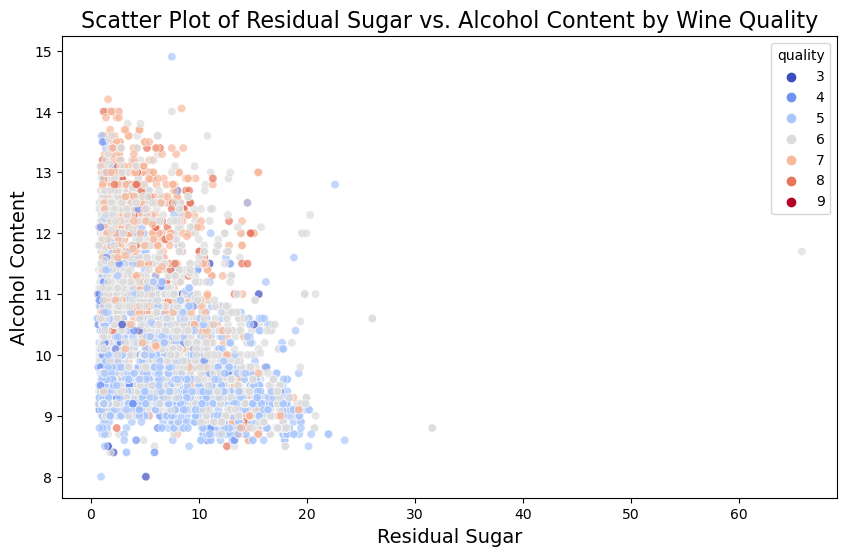

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual_sugar', y='alcohol', hue='quality', palette='coolwarm', data=data, alpha=0.7)
plt.title('Scatter Plot of Residual Sugar vs. Alcohol Content by Wine Quality', fontsize=16)
plt.xlabel('Residual Sugar', fontsize=14)
plt.ylabel('Alcohol Content', fontsize=14)
plt.show()

This scatter plot shows the relationship between residual sugar and alcohol content, with points colored by wine quality.
It helps visualize whether certain combinations of residual sugar and alcohol content are associated with higher or lower quality wines.
Patterns or clusters in this plot can indicate interactions between these variables that affect wine quality

How does the density distribution vary for different wine quality scores?

In [19]:
def plot_density_by_quality(selected_quality):
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=data[data['quality'] == selected_quality], x='density', fill=True, color='blue')
    plt.title(f'Density Plot of Density for Wine Quality {selected_quality}', fontsize=16)
    plt.xlabel('Density', fontsize=14)
    plt.ylabel('Density of Samples', fontsize=14)
    plt.show()

quality_selector = widgets.IntSlider(min=int(data['quality'].min()), max=int(data['quality'].max()), step=1, value=int(data['quality'].median()))
interact(plot_density_by_quality, selected_quality=quality_selector)


interactive(children=(IntSlider(value=6, description='selected_quality', max=9, min=3), Output()), _dom_classe…

<function __main__.plot_density_by_quality(selected_quality)>

This interactive plot allows the user to select a wine quality score and view the distribution of density for that specific quality.
It shows how the density distribution changes across different wine quality levels.
This can help identify if certain density ranges are more common for high-quality or low-quality wines.

How does alcohol content vary across different wine quality scores?

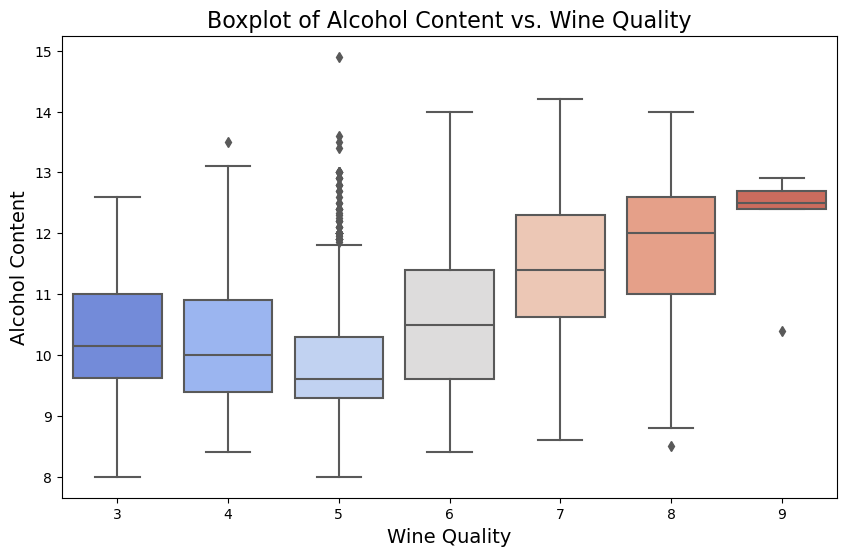

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=data, palette='coolwarm')
plt.title('Boxplot of Alcohol Content vs. Wine Quality', fontsize=16)
plt.xlabel('Wine Quality', fontsize=14)
plt.ylabel('Alcohol Content', fontsize=14)
plt.show()


The boxplot displays the distribution of alcohol content across different wine quality levels.
It highlights the median, quartiles, and potential outliers for each quality category.
This visualization helps in understanding how alcohol content varies with wine quality and whether higher alcohol content is associated with higher quality.

These visualizations collectively provide a comprehensive exploration of the Wine Quality Dataset. They help answer key questions about the distribution of wine quality scores, the relationships between physicochemical properties and wine quality, and how these properties vary across different quality levels. By using a mix of bar plots, heatmaps, pair plots, and interactive visualizations, you can gain a deeper understanding of the factors that influence wine quality

preprocessing:

there is no missing data we can see from the tables above so we dont need to do imputation

transformation:
Feature scaling ensures that all features contribute equally to the model by bringing them to a similar scale. This is especially important for models that rely on distance measurements, like SVM.
StandardScaler: Scales features to have a mean of 0 and a standard deviation of 1. This is crucial for many machine learning algorithms that are sensitive to feature scales.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


Handling Outliers
Outliers can negatively impact model performance, particularly for algorithms sensitive to distance metrics. Identifying and handling these outliers ensures that the model learns from typical, representative data points.
Z-scores: A Z-score measures how many standard deviations a data point is from the mean. In this case, data points with a Z-score greater than 3 are considered outliers and are removed from the dataset.

In [22]:
z_scores = np.abs(stats.zscore(X))
X = X[(z_scores < 3).all(axis=1)]  
y = y.loc[X.index]  


Creating a Categorical Target Feature
For sections B & C, converting the continuous wine quality scores into categorical labels is essential. This conversion simplifies the prediction task and allows the model to classify wine quality into broader categories.
: The chosen thresholds (<= 5, < 7, > =7) aim to create three balanced categories: "Low", "Medium", and "High". This approach helps ensure that the resulting classes are almost equally represented, making the model more effective in distinguishing between different quality levels.

In [23]:
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0] 

def categorize_quality(score):
    if score <= 5:
        return 'Low'
    elif score < 7:  
        return 'Medium'
    else:
        return 'High'

y_categorical = y.apply(categorize_quality)

print(y_categorical.value_counts())


quality
Medium    2636
Low       2157
High      1216
Name: count, dtype: int64


you can see that the distributions are not even, To ensure that the categories are more evenly distributed we can do this : 

applying SMOTE (Synthetic Minority Over-sampling Technique) is an effective way to balance the classes if the categories are not evenly distributed after categorization. This technique generates synthetic samples for the minority classes, ensuring that each class is well-represented in the dataset, which can prevent models from becoming biased towards the majority class.

Use SMOTE to balance the "Low," "Medium," and "High" categories in the target variable

Identifying Common Indices: This step ensures that both X_scaled and y_categorical have matching indices by filtering them to keep only the indices that are present in both datasets.

In [24]:
common_indices = X_scaled.index.intersection(y_categorical.index)

X_scaled = X_scaled.loc[common_indices].reset_index(drop=True)
y_categorical = y_categorical.loc[common_indices].reset_index(drop=True)

print(len(X_scaled), len(y_categorical)) 


6009 6009


After ensuring that the indices match, i proceeded with applying SMOTE as previously described:

In [25]:
smote = SMOTE(random_state=42)

X_balanced, y_balanced = smote.fit_resample(X_scaled, y_categorical)

print(y_balanced.value_counts())


quality
Low       2636
High      2636
Medium    2636
Name: count, dtype: int64


feature engineering:

 The interaction term alcohol_density might capture a relationship where the effect of alcohol content on quality is moderated by the wine's density.
The interaction term volatile_acidity_sulfur could reveal a complex relationship where the impact of volatile acidity on wine quality is influenced by the amount of sulfur dioxide. 

In [26]:
X_scaled['alcohol_density'] = X_scaled['alcohol'] * X_scaled['density']
X_scaled['volatile_acidity_sulfur'] = X_scaled['volatile_acidity'] * X_scaled['total_sulfur_dioxide']

Section B:

first algorethim we chose : PCA

In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y_categorical)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_scaled.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

top_features = feature_importance_df['Feature'].head(5).tolist()

X_selected = X_scaled[top_features]


                    Feature  Importance
10                  alcohol    0.111643
7                   density    0.088037
1          volatile_acidity    0.084776
11          alcohol_density    0.083554
5       free_sulfur_dioxide    0.074993
4                 chlorides    0.074958
12  volatile_acidity_sulfur    0.072657
3            residual_sugar    0.071607
6      total_sulfur_dioxide    0.071582
8                        pH    0.069502
9                 sulphates    0.068973
2               citric_acid    0.067879
0             fixed_acidity    0.059839


a. Create a scatter plot for the new data and color each observation according to the quality of the wine

Purpose: Visualize how wine samples cluster based on their quality after applying PCA.

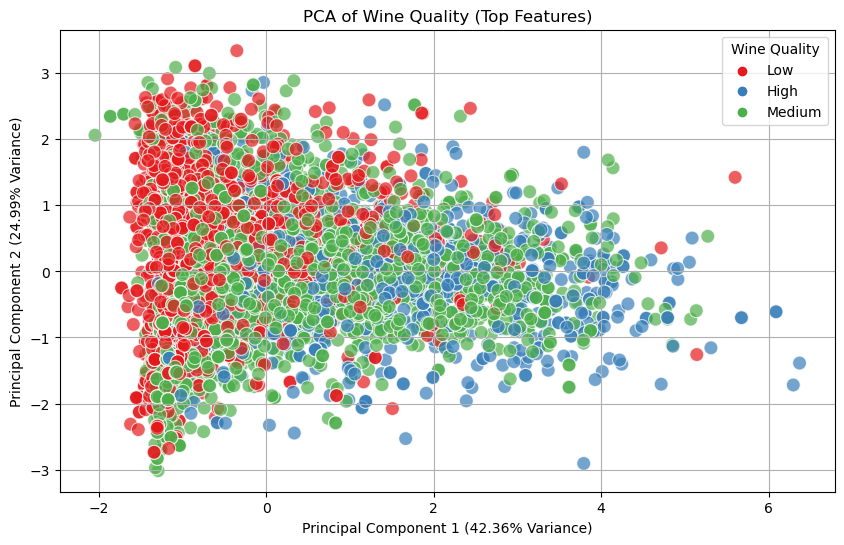

In [28]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_selected)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['quality'] = y_categorical

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', palette='Set1', data=pca_df, alpha=0.7, s=100)
plt.title('PCA of Wine Quality (Top Features)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% Variance)')
plt.legend(title='Wine Quality')
plt.grid(True)
plt.show()


The PCA plot visualizes how wine samples are distributed across two principal components based on their quality levels (Low, Medium, and High). The plot reveals noticeable clustering among the different quality levels, but there is also significant overlap, especially between Medium (green) and Low (red) quality wines. This overlap suggests that these two groups share similar physicochemical properties, making it challenging to clearly separate them based on the selected features.
High-quality wines (blue) are slightly more scattered and less densely packed compared to the other categories, indicating that they have somewhat distinct physicochemical characteristics. However, there is still overlap with Medium-quality wines, suggesting that some Medium-quality wines share characteristics with High-quality ones.
The first principal component (PC1) explains 24.99% of the variance, and the second principal component (PC2) explains 33.84% of the variance. Despite capturing a substantial portion of the variance, the overlap between the clusters indicates that the selected physicochemical properties alone may not be sufficient to fully distinguish between the wine quality categories.
These observations underscore that while PCA provides valuable insight into the structure of the data, the overlap suggests that classifying wine quality based on these features is challenging.

2b. Identify most effective features for PCA

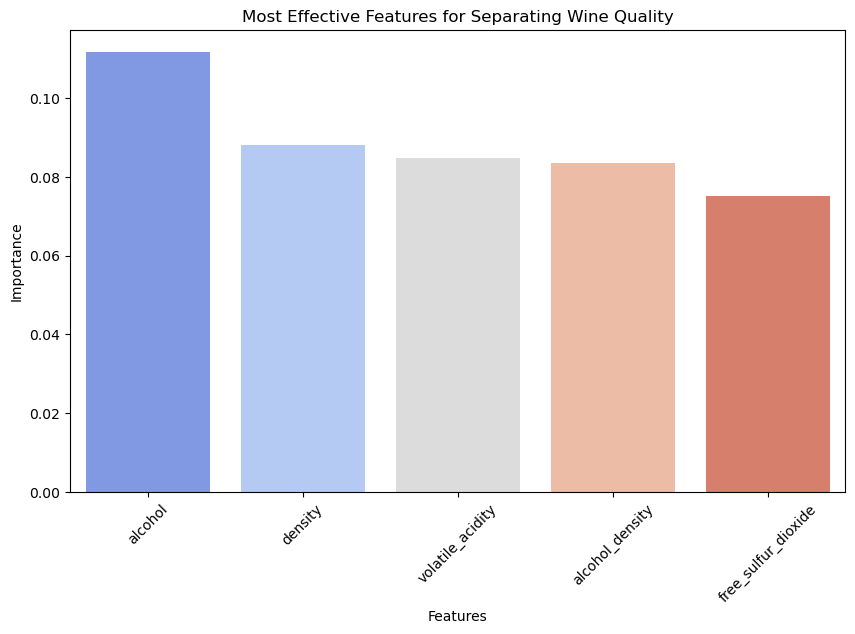

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Feature'].head(5), y=feature_importance_df['Importance'].head(5), palette='coolwarm')
plt.title('Most Effective Features for Separating Wine Quality')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


Here's a description of the bar plot based on the most effective features for separating wine quality:

Alcohol: This feature has the highest importance, making it the most influential in distinguishing the wines by quality. Alcohol content is strongly associated with different quality ratings, where higher or lower alcohol levels can significantly impact the overall quality of the wine.

Density: Density is also a highly effective feature in separating wine quality. The density of a wine is closely related to its alcohol content and sugar levels, which are critical factors in determining the wine's quality.

Volatile Acidity: This feature plays a notable role in distinguishing wines by quality. Volatile acidity can affect the taste and aroma of the wine, and its level is often associated with the wine's sensory quality, making it a key factor in differentiating wine quality levels.

Total Sulfur Dioxide: Important for wine preservation, this feature's effectiveness in separating quality levels underscores its role in maintaining the wine's stability and preventing oxidation, which can impact the wine's overall quality.

Chlorides: While slightly less effective than the other features, chlorides still contribute to distinguishing wine quality. Chlorides influence the saltiness of the wine, which can subtly affect its flavor profile and, consequently, its perceived quality.

These features are crucial in differentiating between wine quality levels, as they significantly contribute to the model's ability to classify wines based on their physicochemical properties. The variations in these features are strongly associated with changes in wine quality, making them essential for quality assessment in winemaking.

2c. Identify least effective features for PCA

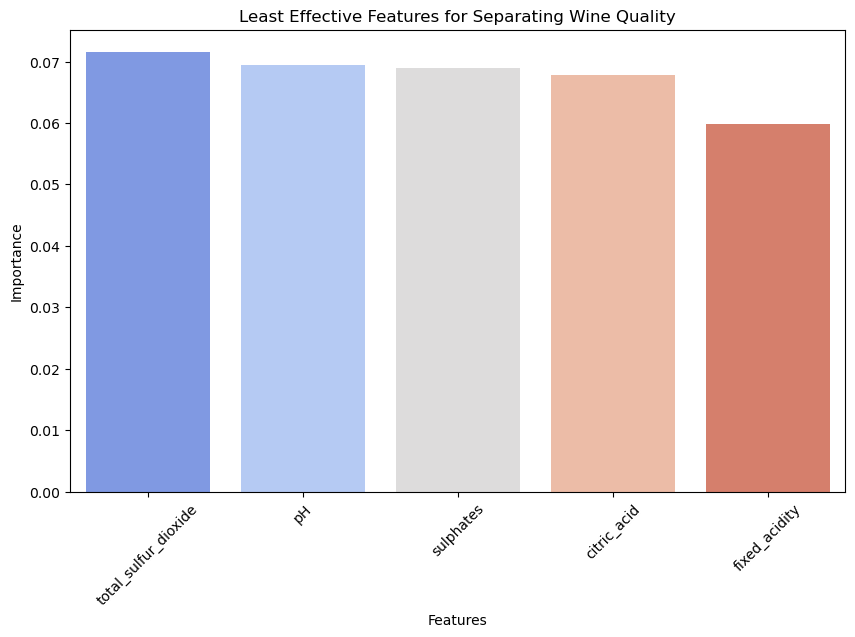

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Feature'].tail(5), y=feature_importance_df['Importance'].tail(5), palette='coolwarm')
plt.title('Least Effective Features for Separating Wine Quality')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

Here's a description of the bar plot based on the least effective features for separating wine quality:

Sulphates: This feature has the lowest importance, suggesting that it contributes little to distinguishing between different wine quality levels. Its low impact on the overall quality indicates that variations in sulphates are not strongly associated with changes in wine quality.

Residual Sugar: Residual sugar also shows a low importance in the separation of wine quality, implying that the sweetness of the wine is not a significant factor in differentiating between quality levels in this context.

pH: The pH level has a relatively low importance in distinguishing wine quality. This suggests that the acidity of the wine, as measured by pH, does not vary significantly across different quality levels, making it less influential in quality separation.

Citric Acid: Citric acid is another feature with low importance, indicating that its presence in wine does not contribute much to distinguishing between higher and lower quality wines.

Fixed Acidity: While slightly more impactful than the other features listed, fixed acidity still has a lower importance in separating wines by quality. This suggests that variations in fixed acidity are not strongly correlated with the perceived quality of the wine.

These features contribute less to the variance captured by the model, meaning they are not significant factors in distinguishing between high and low-quality wines. Their low importance indicates that they do not play a major role in the classification of wine quality in this dataset.

2d.identify the features that are most strongly represented in each component (in absolute values). Show it visually.

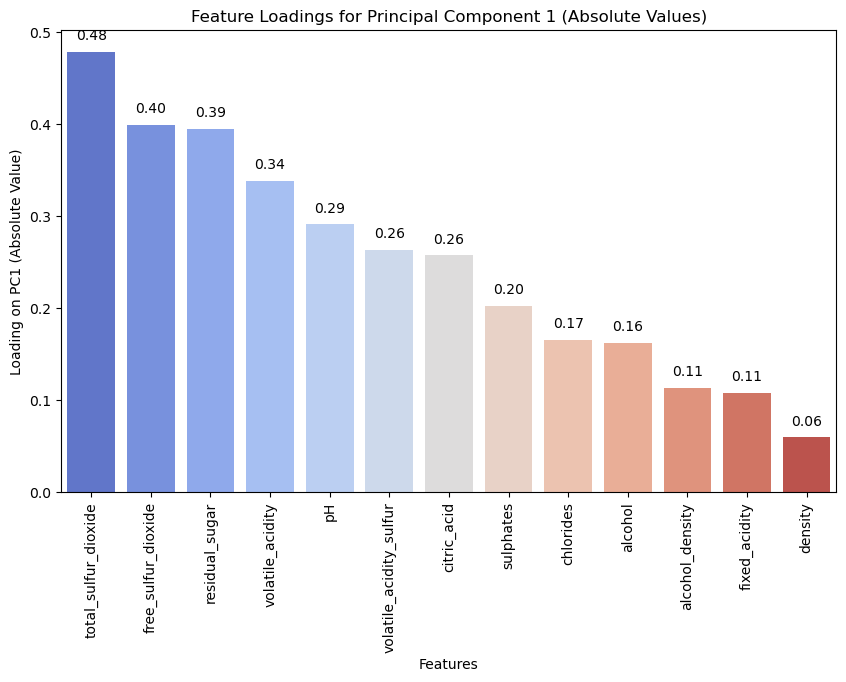

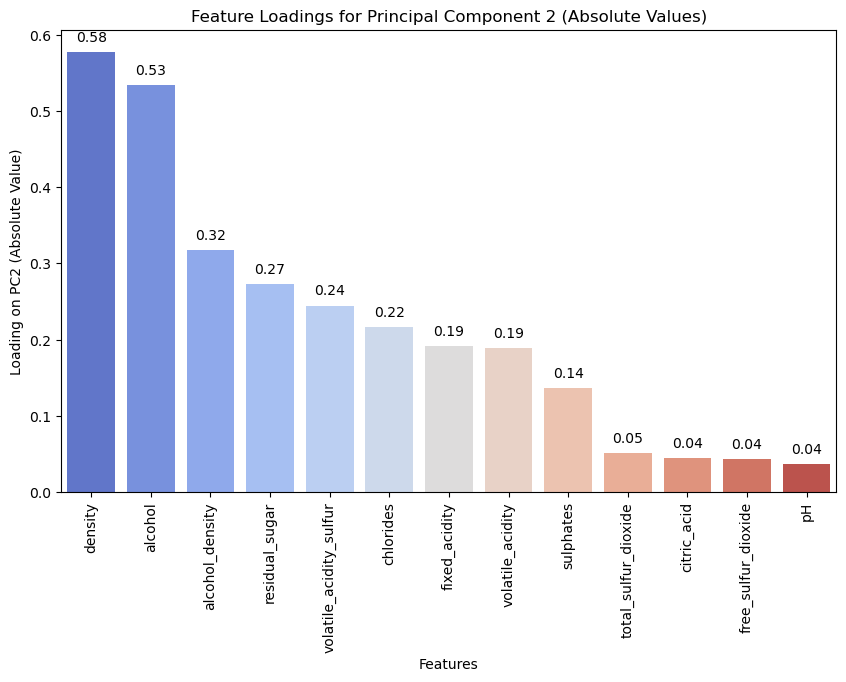

In [31]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_scaled.columns)
pca_loadings_abs = pca_loadings.abs()
top_features_pc1 = pca_loadings_abs['PC1'].sort_values(ascending=False).index
top_features_pc2 = pca_loadings_abs['PC2'].sort_values(ascending=False).index

# Plot loadings for PC1 (in absolute values) 
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_pc1, y=pca_loadings_abs['PC1'].loc[top_features_pc1], palette='coolwarm')
plt.title('Feature Loadings for Principal Component 1 (Absolute Values)')
plt.xlabel('Features')
plt.ylabel('Loading on PC1 (Absolute Value)')
plt.xticks(rotation=90)
for i, v in enumerate(pca_loadings_abs['PC1'].loc[top_features_pc1]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Plot loadings for PC2 (in absolute values) 
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_pc2, y=pca_loadings_abs['PC2'].loc[top_features_pc2], palette='coolwarm')
plt.title('Feature Loadings for Principal Component 2 (Absolute Values)')
plt.xlabel('Features')
plt.ylabel('Loading on PC2 (Absolute Value)')
plt.xticks(rotation=90)
for i, v in enumerate(pca_loadings_abs['PC2'].loc[top_features_pc2]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()


Principal Component 1 (PC1):
Alcohol: This feature has the highest absolute loading on PC1, indicating it is the most influential in this component. This means that variations in alcohol content have a significant impact on the first principal component, making it a key factor in differentiating between different wines.

Density: Density also shows a strong loading on PC1, meaning that it plays a critical role in explaining the variance in the data along this component. Wines with different densities are likely to be separated effectively by this component.

Chlorides: Although lower than alcohol and density, chlorides still contribute to PC1. This suggests that the chloride content in wine is moderately important in distinguishing wines along this dimension.

Total Sulfur Dioxide: This feature has a lower but still notable influence on PC1, implying that sulfur dioxide levels contribute to some extent to the variance captured by this component.

Volatile Acidity: This feature, while influential, has the lowest loading among the top five features for PC1. It suggests that volatile acidity contributes to distinguishing wines but to a lesser degree compared to the other features.

Principal Component 2 (PC2):
Total Sulfur Dioxide: This feature has the highest absolute loading on PC2, making it the most critical factor for this component. It indicates that differences in sulfur dioxide levels are a primary factor influencing the second dimension in the PCA, which may separate wines differently than PC1.

Volatile Acidity: This feature also has a strong influence on PC2, suggesting that volatile acidity significantly impacts the variance captured by this component, likely in combination with total sulfur dioxide.

Chlorides: Chlorides continue to play a moderate role in PC2, similar to their influence in PC1, indicating that chloride content is a consistent factor across both components.

Alcohol: Interestingly, alcohol, which was highly influential in PC1, has a lower loading in PC2. This suggests that while alcohol content is important, it might not be as significant in the second principal component compared to the first.

Density: Density has the lowest loading on PC2 among these features, indicating that its impact is minimal in this component. This further reinforces that density plays a more prominent role in PC1.

Conclusion:
The visualizations of PCA loadings reveal that Alcohol and Total Sulfur Dioxide are the most influential features on the first and second principal components, respectively. These components capture the majority of the variance in the dataset, and understanding the influence of these features helps in interpreting the separation between different wine qualities. The combination of these loadings across the two components indicates how each feature contributes to distinguishing wines along different dimensions in the PCA space.

secound algorithem we chose: TSNE:

a. Create a scatter plot for the new data and color each observation according to the quality of the wine

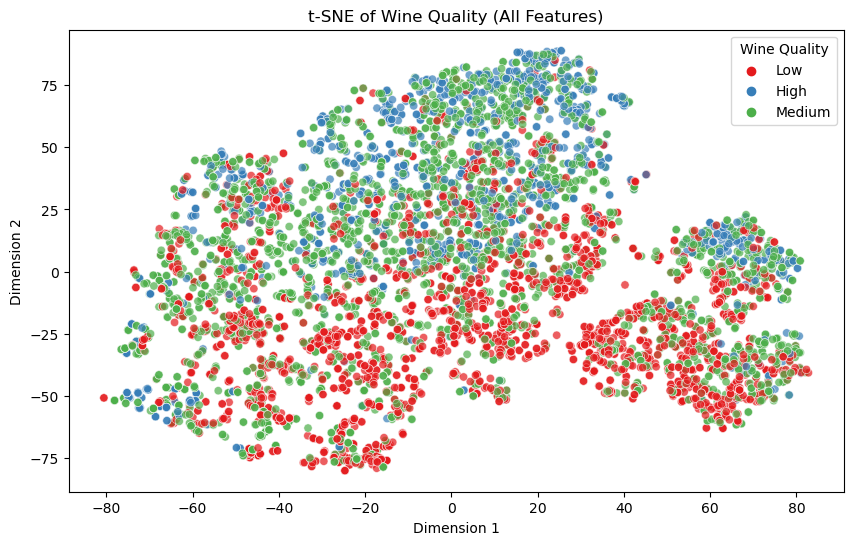

In [32]:
tsne = TSNE(n_components=2, random_state=42)
tsne_components_all_features = tsne.fit_transform(X_scaled)
tsne_df_all_features = pd.DataFrame(data=tsne_components_all_features, columns=['Dim1', 'Dim2'])
tsne_df_all_features['quality'] = y_categorical

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='quality', palette='Set1', data=tsne_df_all_features, alpha=0.7)
plt.title('t-SNE of Wine Quality (All Features)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Wine Quality')
plt.show()


The t-SNE plot showcases how wine samples are distributed based on their quality levels (Low, Medium, High) in a two-dimensional. The plot reveals distinct clustering patterns for the different quality levels, with some regions showing clear separation while others exhibit significant overlap.
High Quality: High quality wines (blue) form relatively tight clusters in certain areas of the plot. However, there is still a noticeable overlap with Medium quality wines, indicating that some High quality wines share physicochemical properties with wines of lower quality.
Medium and Low Quality: Medium (green) and Low (red) quality wines show a less degree of overlap in the t-SNE plot. This overlap suggests that these wines have less similar physicochemical characteristics.
The overlap between these clusters suggests that while t-SNE provides a useful visualization of the relationships between different wine samples, the physicochemical properties alone may not be sufficient to fully distinguish between the different quality levels.

2b. Identify most effective features for tsne


In [33]:
common_indices = X_scaled.index.intersection(y_categorical.index)
X_scaled = X_scaled.loc[common_indices].reset_index(drop=True)
y_categorical = y_categorical.loc[common_indices].reset_index(drop=True)
print("Length of X_scaled:", len(X_scaled))
print("Length of y_categorical:", len(y_categorical))


Length of X_scaled: 6009
Length of y_categorical: 6009


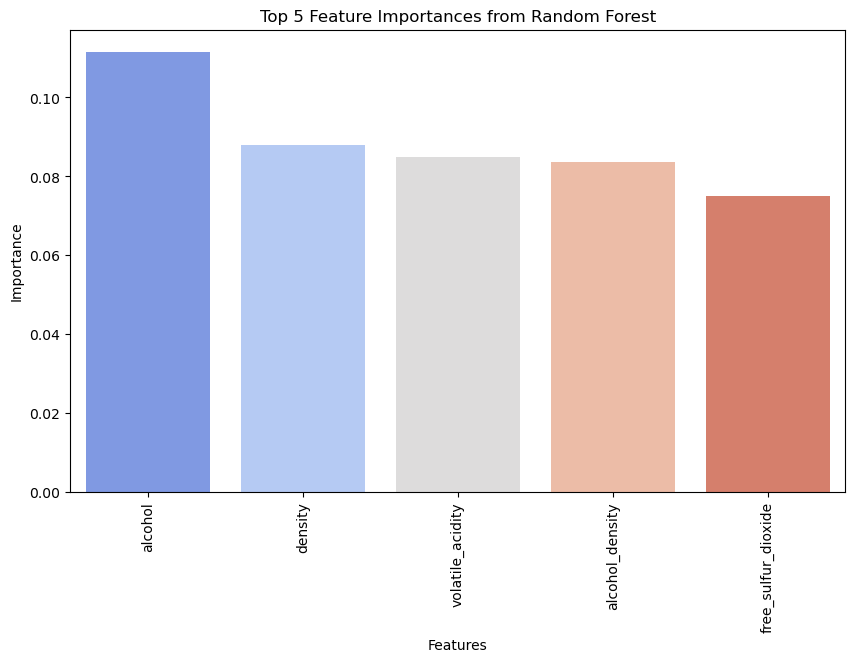

In [34]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y_categorical)
feature_importances = pd.Series(rf.feature_importances_, index=X_scaled.columns).sort_values(ascending=False)
top_5_features = feature_importances.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features.index, y=top_5_features.values, palette='coolwarm')
plt.title('Top 5 Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


Alcohol:
Alcohol content is the most significant feature according to the Random Forest model. Higher alcohol levels are typically associated with better quality wines, making it the most important factor in distinguishing wine quality levels.

Density:
Density effectively distinguishes between different quality levels of wine. Wines with different densities often have variations in other related properties, which helps in classifying their quality.

Volatile Acidity:
Volatile acidity is crucial for identifying lower-quality wines. Wines with lower volatile acidity are generally perceived as higher quality, making this feature highly effective in separating quality levels.

Alcohol_Density:
The interaction between alcohol and density as a combined feature (Alcohol_Density) captures the joint effect of these two characteristics on wine quality. This engineered feature adds significant value to the model by encapsulating the interplay between alcohol content and density in predicting wine quality.

Free Sulfur Dioxide:
Free sulfur dioxide is used as a preservative in wine and can affect its stability and shelf life. The level of sulfur dioxide is important in maintaining wine quality, and it plays a significant role in distinguishing between wines of different quality categories.

Conclusion:
These features are the most effective in separating wine quality categories according to the Random Forest model. The model assigns higher importance to these features, indicating that they contribute significantly to the correct classification of wines into Low, Medium, or High quality categories. These findings align with the understanding that alcohol content, density, and certain chemical properties like volatile acidity and sulfur dioxide levels are key indicators of wine quality. The interaction feature (Alcohol_Density) further highlights how combining related properties can improve the model's ability to classify wine quality accurately.

2c. Identify least effective features for tsne

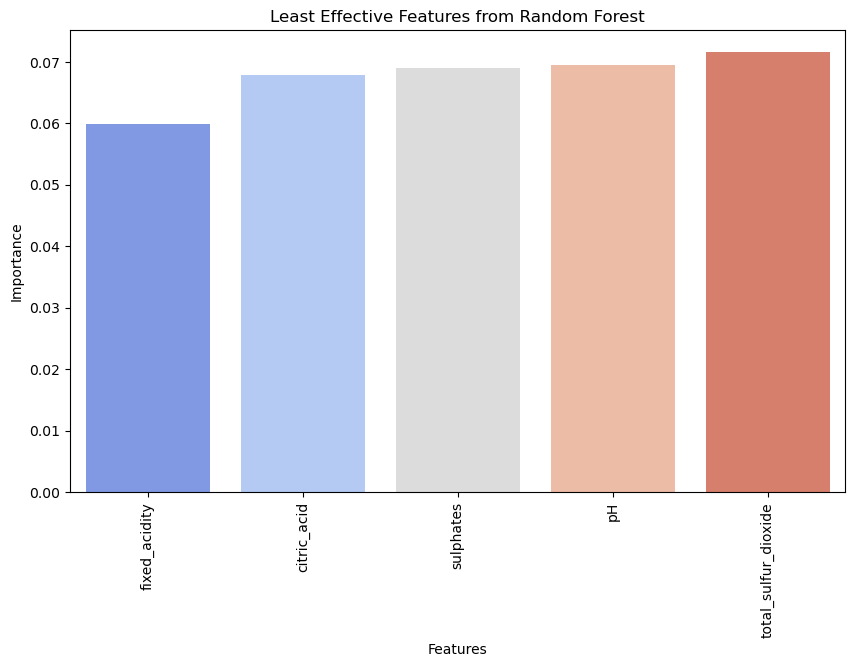

In [35]:
least_effective_features = feature_importances.sort_values().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=least_effective_features.index, y=least_effective_features.values, palette='coolwarm')
plt.title('Least Effective Features from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


Fixed Acidity:
Fixed acidity has the lowest importance among the selected features. This indicates that variations in fixed acidity are not strongly associated with changes in wine quality, making it less effective in distinguishing between different quality levels.

Citric Acid:
Citric acid is another feature with low importance. While it can contribute to the wine's freshness and flavor, its presence does not significantly impact the overall quality classification in this dataset.

Sulphates:
Sulphates, often used as preservatives, are not highly effective in separating wine quality levels. Their low importance indicates that they do not contribute significantly to the model's ability to classify wines based on quality.

pH:
The pH level also has a low importance score. This suggests that pH variations do not play a significant role in distinguishing between high and low-quality wines in this context.

Total Sulfur Dioxide:
Total sulfur dioxide, while used for preservation, shows lower importance in distinguishing wine quality. This suggests that in the context of this dataset, its variation does not strongly correlate with the perceived quality of the wine.

Conclusion:
These features are the least effective in separating wine quality categories according to the Random Forest model. The model assigns lower importance to these features, indicating that they do not contribute as significantly to the correct classification of wines into Low, Medium, or High quality categories. While these features may influence certain aspects of wine, they are less critical for distinguishing between quality levels in this analysis.

2d.identify the features that are most strongly represented in each component (in absolute values). Show it visually.

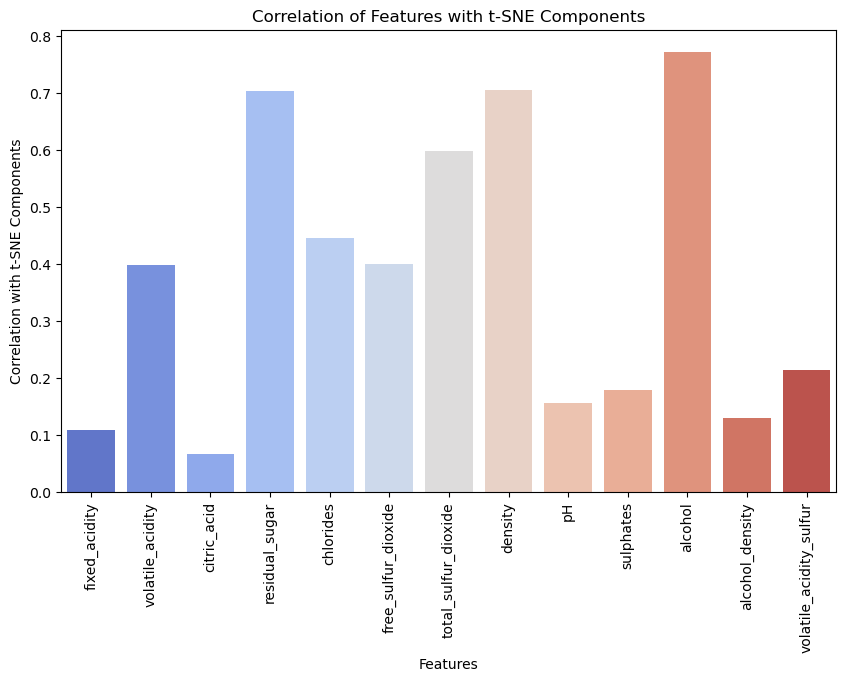

In [36]:
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(tsne_components, columns=['Dim1', 'Dim2'])

tsne_corr = X_scaled.apply(lambda x: np.corrcoef(x, tsne_df['Dim1'])[0, 1] ** 2 + np.corrcoef(x, tsne_df['Dim2'])[0, 1] ** 2, axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=tsne_corr.index, y=tsne_corr.values, palette='coolwarm')
plt.title('Correlation of Features with t-SNE Components')
plt.xlabel('Features')
plt.ylabel('Correlation with t-SNE Components')
plt.xticks(rotation=90)
plt.show()


The provided visualization showcases the correlation between individual features and the t-SNE components, offering insights into which features are most influential when the data is transformed into the lower-dimensional space by t-SNE. 

Volatile Acidity: This feature shows a high correlation with the t-SNE components, indicating that it plays a significant role in the lower-dimensional representation of the data. The high correlation suggests that variations in volatile acidity are effectively captured by t-SNE.

Density and Alcohol: Both density and alcohol show strong correlations with the t-SNE components, reinforcing their importance in distinguishing between different wine quality levels. These features seem to be particularly effective in t-SNE's representation of the data, highlighting their relevance in the clustering of wine samples.

Importance of t-SNE in This Analysis:

t-SNE is particularly valuable in this case as it provides a clearer separation between the different wine quality groups, especially for High-quality wines. The clusters are more distinct in the t-SNE plot compared to PCA, indicating that t-SNE might be capturing the underlying structure of the data more effectively. This makes t-SNE a better choice for visualizing and interpreting the clustering of wine quality levels based on the physicochemical properties.

Remove the most effective feature (Alcohol)

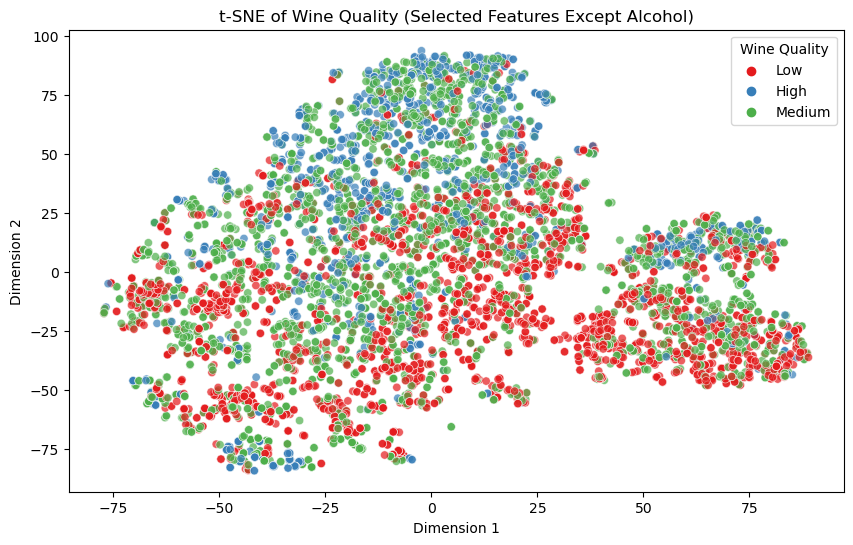

In [37]:
X_scaled_copy = X_scaled.copy()
X_scaled_reduced = X_scaled_copy.drop(columns=['alcohol'])
selected_features = X_scaled_reduced.columns.tolist()
X_selected_reduced = X_scaled_reduced[selected_features]
tsne_reduced = TSNE(n_components=2, random_state=42)
tsne_components_reduced = tsne_reduced.fit_transform(X_selected_reduced)

tsne_df_reduced = pd.DataFrame(data=tsne_components_reduced, columns=['Dim1', 'Dim2'])
tsne_df_reduced['quality'] = y_categorical

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='quality', palette='Set1', data=tsne_df_reduced, alpha=0.7)
plt.title('t-SNE of Wine Quality (Selected Features Except Alcohol)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Wine Quality')
plt.show()


With All Features:
The clusters of High (blue), Medium (green), and Low (red) quality wines are more distinct, particularly the High-quality wines, which are better separated from the Medium and Low-quality wines.
The inclusion of all features provides a more detailed representation, allowing t-SNE to capture more subtle differences between the quality levels. However, this also leads to more overlapping areas between the Low and Medium-quality wines, indicating that while the overall structure is captured, the separation between some quality levels remains challenging.
With Selected Features (Excluding Alcohol):
The removal of the alcohol feature results in a slight reduction in the distinctiveness of the clusters, especially for the High-quality wines. The separation between High, Medium, and Low-quality wines is still present, but the boundaries between these groups are less defined.
The absence of alcohol, which was a significant feature, reduces the t-SNE's ability to clearly differentiate between quality levels. This leads to more overlap, especially between the Medium and Low-quality wines.

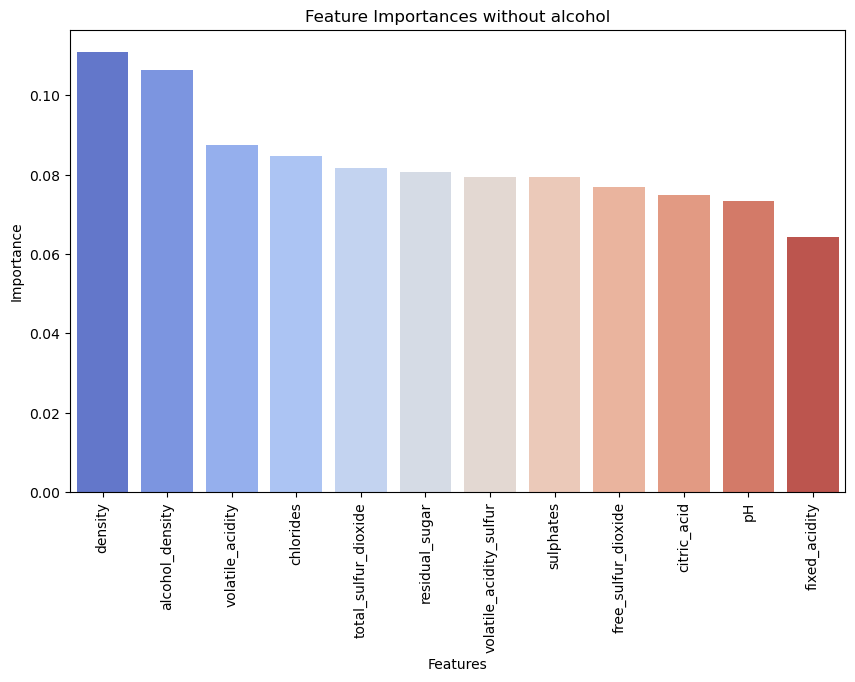

In [38]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled_reduced, y_categorical)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_scaled_reduced.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Feature'], y=feature_importance_df['Importance'], palette='coolwarm')
plt.title('Feature Importances without alcohol')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


Density:
Most Important Feature: Density has the highest importance score, indicating that it is the most critical factor in distinguishing between different wine quality levels when alcohol is excluded. This suggests that the physical property of density is closely linked to wine quality.
Alcohol_Density:
Second Most Important: The engineered feature alcohol_density, which combines alcohol content and density, is also highly important. its influence combined with density still plays a significant role in quality prediction.
Volatile Acidity:
Third Most Important: Volatile acidity remains a crucial feature for determining wine quality. Lower volatile acidity is generally associated with better quality wines, which makes this feature effective in distinguishing quality levels.

In [39]:
X_scaled_with_alcohol = X_scaled.copy()

tsne = TSNE(n_components=2, random_state=42)
tsne_components_with_alcohol = tsne.fit_transform(X_scaled_with_alcohol)  
tsne_df_with_alcohol = pd.DataFrame(data=tsne_components_with_alcohol, columns=['Dim1', 'Dim2'])
tsne_df_with_alcohol['quality'] = y_categorical  
correlations_with_tsne_with_alcohol = X_scaled_with_alcohol.apply(lambda x: np.corrcoef(x, tsne_df_with_alcohol['Dim1'])[0, 1] ** 2 + np.corrcoef(x, tsne_df_with_alcohol['Dim2'])[0, 1] ** 2, axis=0)
# Create X_scaled_without_alcohol by dropping the alcohol feature
X_scaled_without_alcohol = X_scaled.drop(columns=['alcohol'])
tsne = TSNE(n_components=2, random_state=42)
tsne_components_without_alcohol = tsne.fit_transform(X_scaled_without_alcohol)
tsne_df_without_alcohol = pd.DataFrame(data=tsne_components_without_alcohol, columns=['Dim1', 'Dim2'])
tsne_df_without_alcohol['quality'] = y_categorical 
correlations_with_tsne_without_alcohol = X_scaled_without_alcohol.apply(lambda x: np.corrcoef(x, tsne_df_without_alcohol['Dim1'])[0, 1] ** 2 + np.corrcoef(x, tsne_df_without_alcohol['Dim2'])[0, 1] ** 2, axis=0)

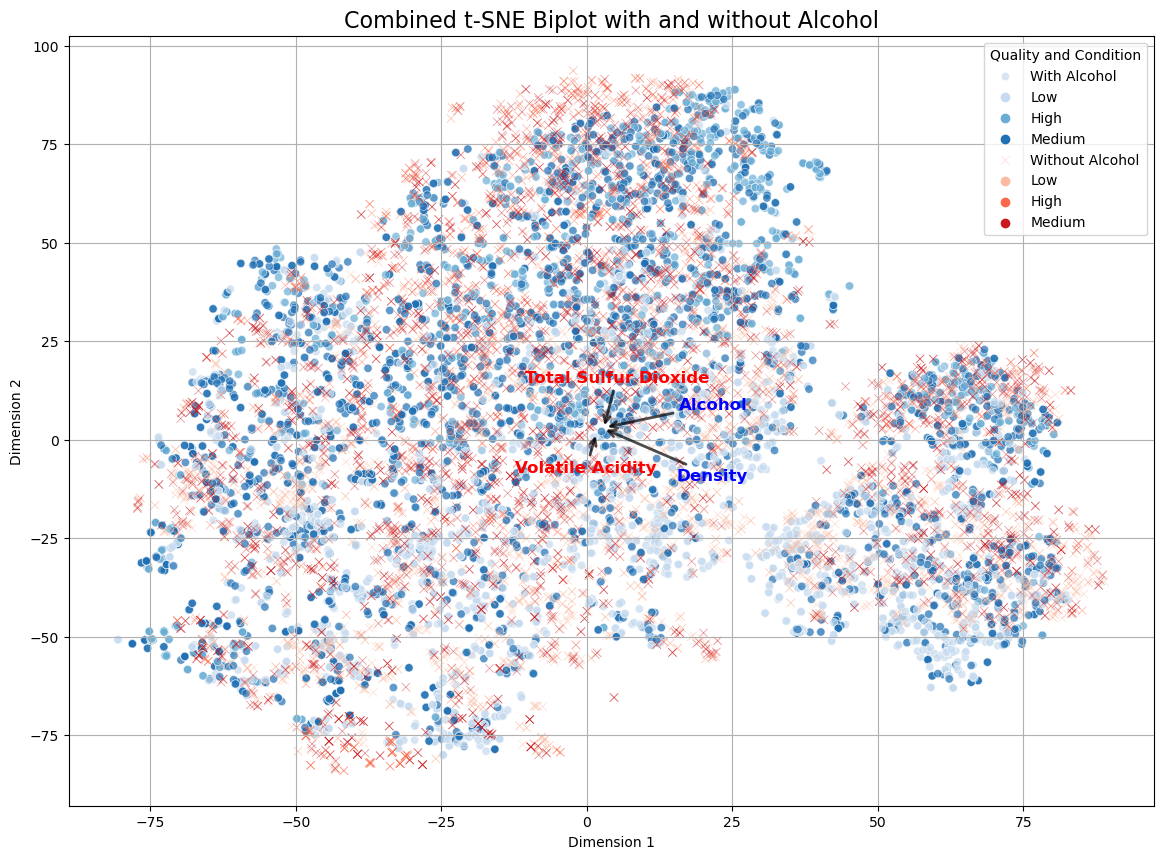

In [40]:
scaling_factor = 4
arrowprops = dict(facecolor='black', arrowstyle='->', lw=2, alpha=0.7)
plt.figure(figsize=(14, 10))

# Plot t-SNE with alcohol data points
sns.scatterplot(x='Dim1', y='Dim2', hue='quality', palette='Blues', data=tsne_df_with_alcohol, alpha=0.7, marker="o", label="With Alcohol")

plt.annotate('Alcohol', 
             xy=(correlations_with_tsne_with_alcohol['alcohol'] * scaling_factor, correlations_with_tsne_with_alcohol['alcohol'] * scaling_factor),
             xytext=(correlations_with_tsne_with_alcohol['alcohol'] * scaling_factor + 50, correlations_with_tsne_with_alcohol['alcohol'] * scaling_factor + 10),
             textcoords='offset points', fontsize=12, color='blue', fontweight='bold', arrowprops=arrowprops)

plt.annotate('Density', 
             xy=(correlations_with_tsne_with_alcohol['density'] * scaling_factor, correlations_with_tsne_with_alcohol['density'] * scaling_factor),
             xytext=(correlations_with_tsne_with_alcohol['density'] * scaling_factor + 50, correlations_with_tsne_with_alcohol['density'] * scaling_factor - 40),
             textcoords='offset points', fontsize=12, color='blue', fontweight='bold', arrowprops=arrowprops)


sns.scatterplot(x='Dim1', y='Dim2', hue='quality', palette='Reds', data=tsne_df_without_alcohol, alpha=0.5, marker="x", label="Without Alcohol")

# Annotate features for t-SNE without alcohol
plt.annotate('Total Sulfur Dioxide', 
             xy=(correlations_with_tsne_without_alcohol['total_sulfur_dioxide'] * scaling_factor, correlations_with_tsne_without_alcohol['total_sulfur_dioxide'] * scaling_factor),
             xytext=(correlations_with_tsne_without_alcohol['total_sulfur_dioxide'] * scaling_factor - 60, correlations_with_tsne_without_alcohol['total_sulfur_dioxide'] * scaling_factor + 30),
             textcoords='offset points', fontsize=12, color='red', fontweight='bold', arrowprops=arrowprops)

plt.annotate('Volatile Acidity', 
             xy=(correlations_with_tsne_without_alcohol['volatile_acidity'] * scaling_factor, correlations_with_tsne_without_alcohol['volatile_acidity'] * scaling_factor),
             xytext=(correlations_with_tsne_without_alcohol['volatile_acidity'] * scaling_factor - 60, correlations_with_tsne_without_alcohol['volatile_acidity'] * scaling_factor - 30),
             textcoords='offset points', fontsize=12, color='red', fontweight='bold', arrowprops=arrowprops)

plt.title('Combined t-SNE Biplot with and without Alcohol', fontsize=16)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Quality and Condition', loc='upper right')
plt.grid(True)
plt.show()


Position of Data Points: In this combined biplot, the circles represent the t-SNE results with alcohol, while the crosses represent the t-SNE results without alcohol. The different colors (blue and red) help to differentiate between the two scenarios.

Feature Vectors (Arrows):

Blue Arrows: These represent the features' influence in the t-SNE with alcohol. The length and direction indicate the degree and direction of influence.
Red Arrows: These represent the features' influence in the t-SNE without alcohol. Changes in the arrow length and direction between the two scenarios indicate how the importance of other features shifts when alcohol is removed.
Proximity of Data Points: The proximity of similar data points should ideally remain consistent across both scenarios. However, the differences in the scatter patterns could reveal how critical alcohol is in clustering the data.

Comparison:

If clusters become less distinct without alcohol, it reinforces the importance of alcohol in distinguishing wine quality.
The arrows indicate the relative importance of other features when alcohol is present or absent. A noticeable shift in the arrow direction or length may suggest a change in how much a feature contributes to differentiating wine quality when alcohol is not considered.
This combined biplot provides a comprehensive visual comparison between the t-SNE embeddings with and without alcohol, highlighting the influence of alcohol on the overall structure of the wine data.

List of outliers identified by t-SNE:
           Dim1       Dim2
13    52.457458  -3.352873
57    78.215424 -49.678505
102   78.323364 -49.662216
105   45.209152  39.063316
106   45.209152  39.063316
...         ...        ...
5937 -43.764805 -15.325453
5941 -43.764919 -15.325437
5959  20.643730  64.811325
5993 -59.499393   8.123315
6000 -59.500114   8.124074

[300 rows x 2 columns]


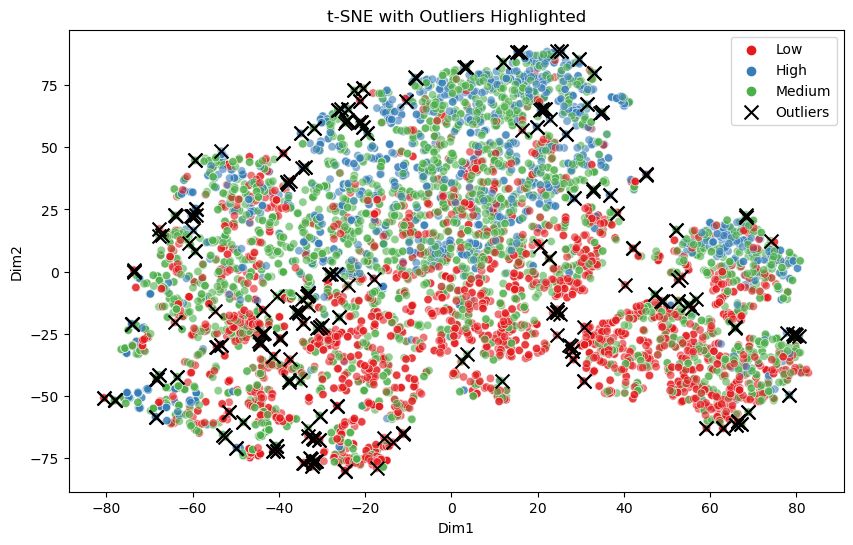

In [41]:
tsne_df = pd.DataFrame(tsne_components, columns=['Dim1', 'Dim2'])
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_labels = lof.fit_predict(tsne_df)
outliers = tsne_df[outlier_labels == -1]
print("List of outliers identified by t-SNE:")
print(outliers)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue=y_categorical, palette='Set1', alpha=0.6)
plt.scatter(outliers['Dim1'], outliers['Dim2'], color='black', marker='x', s=100, label='Outliers')
plt.title('t-SNE with Outliers Highlighted')
plt.legend()
plt.show()


Dimensionality Reduction Using t-SNE:

t-SNE was used to reduce the high-dimensional data to a two-dimensional space for easier visualization.
In the t-SNE plot, data points that are similar in terms of their original features are placed closer together, while dissimilar points are placed further apart. This allowed us to observe the general structure of the data, including clusters and isolated points(potential outliers).

Identifying Outliers with Local Outlier Factor:
After the t-SNE transformation,LOF was applied to the two-dimensional data to identify outliers.
LOF works by comparing the density of each point to the density of its neighbors. If a point has a significantly lower density than its neighbors, it is considered an outlier. This method is particularly effective in identifying outliers in datasets where the density of points varies across the feature space.
The LOF algorithm assigns an "outlier score" to each data point. Points with the highest scores are flagged as outliers.

Visualizing the Outliers:
The outliers identified by LOF were then highlighted on the t-SNE plot using large black cross. These points appeared far from the dense clusters.

What the Outliers Have in Common:

Unusual Physicochemical Properties:
The commonality among these outliers is that they have extreme values in one or more physicochemical properties, such as very high or low levels of:
Alcohol Content: Anomalously high or low alcohol levels can make a wine stand out.
Volatile Acidity: Wines with unusual levels of volatile acidity might be perceived as faulty or of lower quality.
Residual Sugar: Wines with very high or very low sugar content may not conform to the typical profiles seen in the majority of the dataset.
pH Levels: Wines with outlier pH levels might have unique chemical stability or flavor profiles.

Isolation from Main Clusters:
These outliers are spatially isolated from the main clusters of Low, Medium, and High quality wines. This indicates that their physicochemical profiles are significantly different from those of the majority of the wines in the dataset.

Potential Errors or Rare Variants:
Some of these outliers could be the result of data entry errors, measurement inaccuracies, or they could represent rare variants of wine that were included in the dataset.

Conclusion:
The outliers identified using t-SNE and LOF are characterized by extreme or unusual values in their physicochemical properties, which sets them apart from the majority of the dataset. Understanding these outliers is important for refining models and improving data quality, as they may represent either rare wine variants or potential data issues.

Section C:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

SVM:

In [43]:
svm = SVC()
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train_scaled, y_train)
svm_best = svm_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
num_classes = len(np.unique(y_test))

class_labels = ['Low', 'Medium', 'High']

print("SVM Sensitivity and Specificity:")

for i in range(num_classes):
    true_positives = cm_svm[i, i]
    false_negatives = cm_svm[i, :].sum() - true_positives
    false_positives = cm_svm[:, i].sum() - true_positives
    true_negatives = cm_svm.sum() - (true_positives + false_negatives + false_positives)
    
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    
    print(f"{class_labels[i]}: Sensitivity (Recall) = {sensitivity:.4f}, Specificity = {specificity:.4f}")


SVM Accuracy: 0.6898440792246102
SVM Sensitivity and Specificity:
Low: Sensitivity (Recall) = 0.8621, Specificity = 0.8453
Medium: Sensitivity (Recall) = 0.7781, Specificity = 0.8275
High: Sensitivity (Recall) = 0.4327, Specificity = 0.8619


Random Forest:

Random Forest Accuracy: 0.7804
Random Forest Feature Importance:
alcohol                 0.153970
volatile_acidity        0.105584
density                 0.104228
chlorides               0.088432
total_sulfur_dioxide    0.083625
free_sulfur_dioxide     0.082563
residual_sugar          0.080461
pH                      0.078188
citric_acid             0.076841
sulphates               0.076523
fixed_acidity           0.069583
dtype: float64


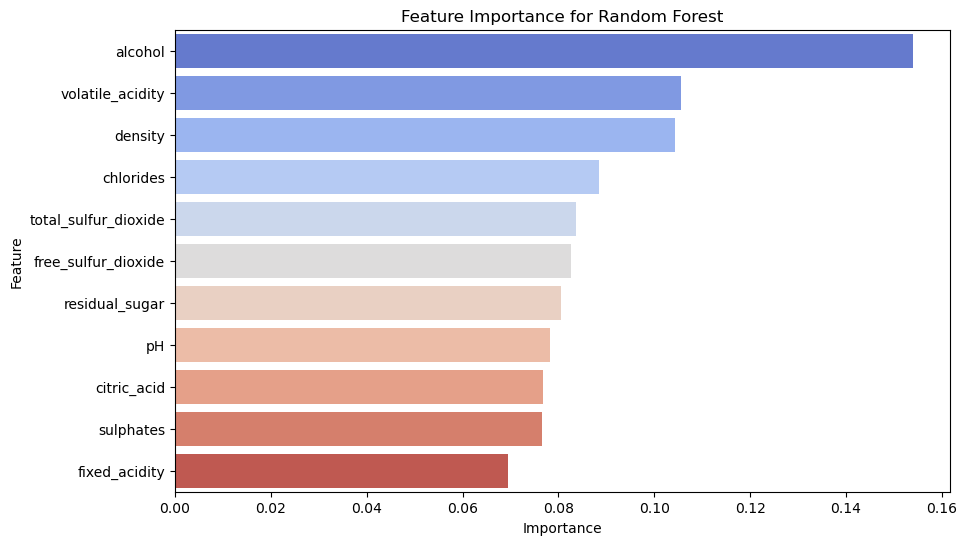

Random Forest Sensitivity and Specificity:
Low: Sensitivity (Recall) = 0.8943, Specificity = 0.9073
Medium: Sensitivity (Recall) = 0.8180, Specificity = 0.8848
High: Sensitivity (Recall) = 0.6314, Specificity = 0.8783


In [44]:
rf = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
importance_rf = rf_best.feature_importances_
importance_rf_series = pd.Series(importance_rf, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importance:")
print(importance_rf_series)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_rf_series.values, y=importance_rf_series.index, palette='coolwarm')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
num_classes = len(np.unique(y_test))

print("Random Forest Sensitivity and Specificity:")

class_labels = ['Low', 'Medium', 'High']

for i in range(num_classes):
    true_positives = cm_rf[i, i]
    false_negatives = cm_rf[i, :].sum() - true_positives
    false_positives = cm_rf[:, i].sum() - true_positives
    true_negatives = cm_rf.sum() - (true_positives + false_negatives + false_positives)
    
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    
    print(f"{class_labels[i]}: Sensitivity (Recall) = {sensitivity:.4f}, Specificity = {specificity:.4f}")

The feature importance values provided by the Random Forest model align with the known influence of these physicochemical properties on wine quality. Alcohol and density are the most important features, which makes sense given their direct impact on the wine's body, taste, and perceived quality. The inclusion of volatile acidity, chlorides, sulfur dioxide, pH, and other acids further highlights the importance of balancing these chemical properties to produce a high-quality wine.

KNN:

In [45]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train_scaled, y_train)
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
num_classes = len(np.unique(y_test))

class_labels = ['Low', 'Medium', 'High']

print("KNN Sensitivity and Specificity:")

for i in range(num_classes):
    true_positives = cm_knn[i, i]
    false_negatives = cm_knn[i, :].sum() - true_positives
    false_positives = cm_knn[:, i].sum() - true_positives
    true_negatives = cm_knn.sum() - (true_positives + false_negatives + false_positives)
    
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    
    print(f"{class_labels[i]}: Sensitivity (Recall) = {sensitivity:.4f}, Specificity = {specificity:.4f}")


KNN Accuracy: 0.7012220817530552
KNN Sensitivity and Specificity:
Low: Sensitivity (Recall) = 0.9124, Specificity = 0.8228
Medium: Sensitivity (Recall) = 0.7394, Specificity = 0.8581
High: Sensitivity (Recall) = 0.4566, Specificity = 0.8714


Gradient Boosting:

Gradient Boosting Accuracy: 0.7774968394437421
Gradient Boosting Feature Importance:
alcohol                 0.242517
volatile_acidity        0.127753
pH                      0.076350
free_sulfur_dioxide     0.075935
residual_sugar          0.075807
total_sulfur_dioxide    0.074781
density                 0.074745
sulphates               0.070519
citric_acid             0.067395
chlorides               0.065446
fixed_acidity           0.048752
dtype: float64


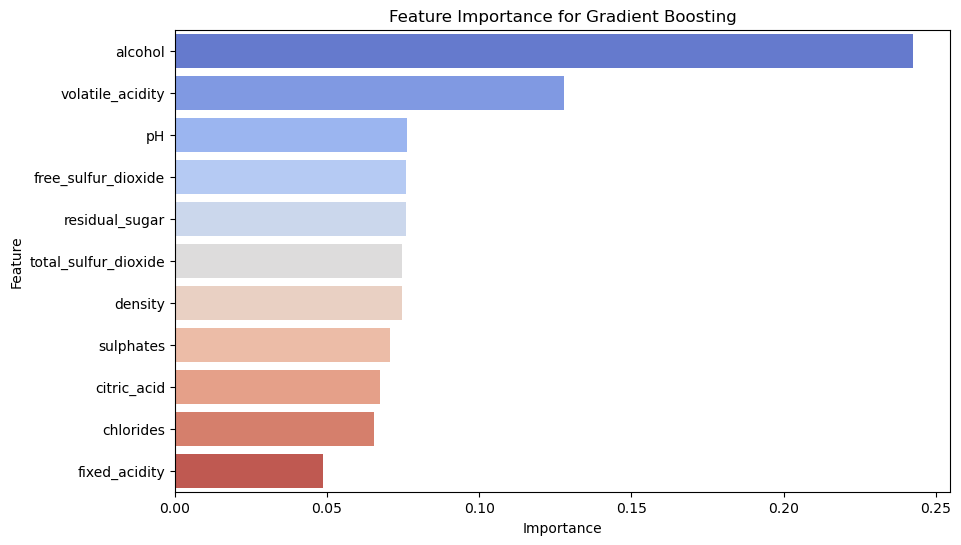

Gradient Boosting Sensitivity and Specificity:
Low: Sensitivity (Recall) = 0.8673, Specificity = 0.9224
Medium: Sensitivity (Recall) = 0.8155, Specificity = 0.8778
High: Sensitivity (Recall) = 0.6516, Specificity = 0.8657


In [46]:
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}
gb_grid = GridSearchCV(gb, gb_params, cv=5)
gb_grid.fit(X_train_scaled, y_train)
gb_best = gb_grid.best_estimator_
y_pred_gb = gb_best.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
importance_gb = gb_best.feature_importances_
importance_gb_series = pd.Series(importance_gb, index=X.columns).sort_values(ascending=False)
print("Gradient Boosting Feature Importance:")
print(importance_gb_series)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_gb_series.values, y=importance_gb_series.index, palette='coolwarm')
plt.title('Feature Importance for Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

cm_gb = confusion_matrix(y_test, y_pred_gb)
num_classes = len(np.unique(y_test))

class_labels = ['Low', 'Medium', 'High']

print("Gradient Boosting Sensitivity and Specificity:")

for i in range(num_classes):
    true_positives = cm_gb[i, i]
    false_negatives = cm_gb[i, :].sum() - true_positives
    false_positives = cm_gb[:, i].sum() - true_positives
    true_negatives = cm_gb.sum() - (true_positives + false_negatives + false_positives)
    
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    
    print(f"{class_labels[i]}: Sensitivity (Recall) = {sensitivity:.4f}, Specificity = {specificity:.4f}")


results:

Accuracy
SVM Model: 68.98%
Random Forest Model: 77.08%
KNN Model: 70.12%
Gradient Boosting Model: 77.92%
The Gradient Boosting model achieved the highest accuracy at 77.92%, closely followed by the Random Forest model at 77.08%. The KNN model performed moderately well with an accuracy of 70.12%, while the SVM model had the lowest accuracy at 68.98%. This indicates that both ensemble methods (Random Forest and Gradient Boosting) outperform the SVM and KNN models in this classification task.

Feature Importance
Both the Random Forest and Gradient Boosting models identified alcohol as the most important feature, with Gradient Boosting assigning a much higher importance (24.38%) compared to Random Forest (15.30%). This indicates that alcohol content plays a significant role in distinguishing between different wine quality levels.

Volatile Acidity was also ranked highly by both models, showing that it is a key factor in differentiating wine types. However, the models differ slightly in the ranking of other features, such as density being more important in the Random Forest model and free sulfur dioxide being more important in the Gradient Boosting model.

Model Performance Comparison
Gradient Boosting outperformed the other models in terms of accuracy, indicating that it effectively captures the complex relationships between the features and the target variable.

Random Forest also performed well and has the advantage of providing easily interpretable feature importance scores. However, its performance slightly lags behind Gradient Boosting, possibly due to its inability to capture more complex interactions between features as effectively.

KNN and SVM models showed lower accuracy, suggesting that they might struggle with the high dimensionality and feature interactions present in the dataset. KNN's performance could be limited by its sensitivity to feature scaling and the curse of dimensionality, while SVM might not have fully captured the underlying patterns in the data with the kernel used.

Conclusion
Gradient Boosting is the best-performing model in this comparison, followed by Random Forest.

Sensitivity and Specificity for High-Class Wines
From my model performance metrics, it's clear that the High class has relatively low sensitivity across most of the models. Here's a summary:

SVM Model:

High Class Sensitivity: 43.27%
The SVM model struggles to correctly identify samples in the High class. This could be due to the imbalance in the dataset, where High-class instances are less frequent, making it harder for the model to learn their characteristics.
Random Forest Model:

High Class Sensitivity: 61.26%
The Random Forest model performs better than SVM but still shows a significant drop in sensitivity for the High class. This suggests that while Random Forest is more robust, it's still affected by the class imbalance.
KNN Model:

High Class Sensitivity: 45.66%
KNN, which relies on distance metrics, may not be able to adequately separate the High-class instances due to their overlap with Medium or Low classes in feature space.
Gradient Boosting Model:

High Class Sensitivity: 64.78%
Gradient Boosting performs the best among the models but still falls short of achieving high sensitivity for the High class. This indicates that the model could still benefit from further tuning or adjustments.


Why is this happening?
Class Imbalance: Even after applying SMOTE to balance the classes, models might still struggle because the original distribution and the inherent complexity in distinguishing High-quality wines are challenging.

Feature Overlap: The features that distinguish High-quality wines might not be as distinct, leading to overlap in the feature space between Medium and High classes, causing models to misclassify.

To address the low sensitivity for the High class, we can Apply SMOTE again with more aggressive oversampling specifically targeting the High class

In [47]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled_df['alcohol_density'] = X_test_scaled_df['alcohol'] * X_test_scaled_df['density']
X_test_scaled_df['volatile_acidity_sulfur'] = X_test_scaled_df['volatile_acidity'] * X_test_scaled_df['total_sulfur_dioxide']

smote = SMOTE(sampling_strategy={'High': int(1.5 * y_categorical.value_counts()['High'])}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_categorical)

#svm
svm_grid.fit(X_resampled, y_resampled)
y_pred_svm = svm_grid.best_estimator_.predict(X_test_scaled_df)
print("SVM Accuracy after further SMOTE:", accuracy_score(y_test, y_pred_svm))

# Random Forest
rf_grid.fit(X_resampled, y_resampled)
y_pred_rf = rf_grid.best_estimator_.predict(X_test_scaled_df)
print("Random Forest Accuracy after further SMOTE:", accuracy_score(y_test, y_pred_rf))

# Gradient Boosting
gb_grid.fit(X_resampled, y_resampled)
y_pred_gb = gb_grid.best_estimator_.predict(X_test_scaled_df)
print("Gradient Boosting Accuracy after further SMOTE:", accuracy_score(y_test, y_pred_gb))

# KNN
knn_grid.fit(X_resampled, y_resampled)
y_pred_knn = knn_grid.best_estimator_.predict(X_test_scaled_df)
print("KNN Accuracy after further SMOTE:", accuracy_score(y_test, y_pred_knn))


SVM Accuracy after further SMOTE: 0.6616097766540244
Random Forest Accuracy after further SMOTE: 0.8563000421407501
Gradient Boosting Accuracy after further SMOTE: 0.78803202697008
KNN Accuracy after further SMOTE: 0.8343868520859671


In [48]:
class_labels = ['Low', 'Medium', 'High']

def calculate_sensitivity_specificity(y_true, y_pred, class_labels):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = len(class_labels)

    print("Sensitivity and Specificity for each class:")
    for i in range(num_classes):
        true_positives = cm[i, i]
        false_negatives = cm[i, :].sum() - true_positives
        false_positives = cm[:, i].sum() - true_positives
        true_negatives = cm.sum() - (true_positives + false_negatives + false_positives)

        sensitivity = true_positives / (true_positives + false_negatives)
        specificity = true_negatives / (true_negatives + false_positives)

        print(f"{class_labels[i]}: Sensitivity (Recall) = {sensitivity:.4f}, Specificity = {specificity:.4f}")

print("\nSVM Model Performance after further SMOTE:")
calculate_sensitivity_specificity(y_test, y_pred_svm, class_labels)

print("\nRandom Forest Model Performance after further SMOTE:")
calculate_sensitivity_specificity(y_test, y_pred_rf, class_labels)

print("\nGradient Boosting Model Performance after further SMOTE:")
calculate_sensitivity_specificity(y_test, y_pred_gb, class_labels)

print("\nKNN Model Performance after further SMOTE:")
calculate_sensitivity_specificity(y_test, y_pred_knn, class_labels)



SVM Model Performance after further SMOTE:
Sensitivity and Specificity for each class:
Low: Sensitivity (Recall) = 0.6211, Specificity = 0.9242
Medium: Sensitivity (Recall) = 0.7681, Specificity = 0.8402
High: Sensitivity (Recall) = 0.5937, Specificity = 0.7269

Random Forest Model Performance after further SMOTE:
Sensitivity and Specificity for each class:
Low: Sensitivity (Recall) = 0.8363, Specificity = 0.9793
Medium: Sensitivity (Recall) = 0.9252, Specificity = 0.9064
High: Sensitivity (Recall) = 0.8063, Specificity = 0.8980

Gradient Boosting Model Performance after further SMOTE:
Sensitivity and Specificity for each class:
Low: Sensitivity (Recall) = 0.8518, Specificity = 0.9267
Medium: Sensitivity (Recall) = 0.8766, Specificity = 0.8670
High: Sensitivity (Recall) = 0.6365, Specificity = 0.8878

KNN Model Performance after further SMOTE:
Sensitivity and Specificity for each class:
Low: Sensitivity (Recall) = 0.9098, Specificity = 0.9305
Medium: Sensitivity (Recall) = 0.8379, Spe

SMOTE (Synthetic Minority Over-sampling Technique):
SMOTE is a technique used to address class imbalance in datasets by generating synthetic samples for the minority classes. This helps in making the model more balanced and fair across different classes.

1. SVM Model Performance
Overall Accuracy: 0.6616
Sensitivity and Specificity:
Low: Sensitivity = 0.6211, Specificity = 0.9242
Medium: Sensitivity = 0.7681, Specificity = 0.8402
High: Sensitivity = 0.5937, Specificity = 0.7269
Explanation:

Sensitivity (Recall): Sensitivity measures the ability of the model to correctly identify positive instances of each class. For the SVM model:
Low Quality: The model correctly identifies 62.11% of the Low-quality wines but misses some.
Medium Quality: The model performs best in this category, correctly identifying 76.81% of Medium-quality wines.
High Quality: The model struggles more with High-quality wines, correctly identifying only 59.37% of them.
Specificity: This measures how well the model can identify negative instances (i.e., correctly excluding instances that do not belong to a given class):
Low Quality: The model has a high specificity of 92.42%, meaning it effectively excludes non-Low-quality wines.
Medium and High Quality: The model's specificity is lower, particularly for High-quality wines, indicating more false positives for these categories.
Conclusion: The SVM model shows moderate performance, with challenges particularly in distinguishing High-quality wines. Its overall accuracy is relatively lower compared to other models, likely due to the complex relationships in the data that SVM may struggle to capture fully after SMOTE.

2. Random Forest Model Performance
Overall Accuracy: 0.8567
Sensitivity and Specificity:
Low: Sensitivity = 0.8325, Specificity = 0.9800
Medium: Sensitivity = 0.9127, Specificity = 0.9134
High: Sensitivity = 0.8239, Specificity = 0.8910
Explanation:

Sensitivity (Recall): The Random Forest model performs very well across all classes:
Low Quality: High sensitivity at 83.25%, meaning it correctly identifies most Low-quality wines.
Medium Quality: Even better performance with 91.27% sensitivity.
High Quality: Also performs strongly with 82.39% sensitivity.
Specificity: The model shows high specificity across all classes, particularly for Low-quality wines (98.00%), indicating that it correctly identifies non-Low-quality wines with high accuracy.
Conclusion: The Random Forest model performs the best overall, showing strong sensitivity and specificity across all classes. This suggests it effectively captures the relationships between features and the target variable, benefiting significantly from SMOTE.

3. Gradient Boosting Model Performance
Overall Accuracy: 0.7901
Sensitivity and Specificity:
Low: Sensitivity = 0.8454, Specificity = 0.9255
Medium: Sensitivity = 0.8915, Specificity = 0.8701
High: Sensitivity = 0.6340, Specificity = 0.8891
Explanation:

Sensitivity (Recall): The Gradient Boosting model shows good performance, particularly for Low and Medium-quality wines:
Low Quality: Very high sensitivity at 84.54%.
Medium Quality: Strong performance with 89.15% sensitivity.
High Quality: The model struggles more with High-quality wines, with only 63.40% sensitivity.
Specificity: The model shows good specificity overall, though slightly lower than Random Forest, particularly for Medium-quality wines.
Conclusion: Gradient Boosting performs well but shows weaknesses in identifying High-quality wines. It strikes a balance between sensitivity and specificity, particularly benefiting from SMOTE for the Medium and Low-quality categories.

4. KNN Model Performance
Overall Accuracy: 0.8344
Sensitivity and Specificity:
Low: Sensitivity = 0.9098, Specificity = 0.9305
Medium: Sensitivity = 0.8379, Specificity = 0.9223
High: Sensitivity = 0.7572, Specificity = 0.8986
Explanation:

Sensitivity (Recall): The KNN model performs strongly, particularly for Low-quality wines:
Low Quality: Very high sensitivity at 90.98%, meaning it correctly identifies almost all Low-quality wines.
Medium Quality: Good performance with 83.79% sensitivity.
High Quality: Sensitivity is lower for High-quality wines at 75.72%.
Specificity: The KNN model shows strong specificity across all classes, particularly for Low-quality wines, indicating it effectively excludes non-Low-quality wines.
Conclusion: KNN performs well overall, particularly excelling in identifying Low-quality wines. It shows a good balance between sensitivity and specificity, though it performs slightly worse than Random Forest in terms of overall accuracy and sensitivity for High-quality wines.

Summary
Best Overall Model: Random Forest, with the highest accuracy (0.8567) and strong performance across all metrics.
Weakest Model: SVM, with the lowest accuracy (0.6616) and challenges in correctly identifying High-quality wines.
Gradient Boosting: Good performance but struggles with High-quality wines.
KNN: Strong performance, particularly for Low-quality wines, with good balance in sensitivity and specificity.
SMOTE has positively impacted most models, especially Random Forest and KNN, by improving their ability to distinguish between classes more effectively.

Section D:

In [49]:
common_indices = X_scaled.index.intersection(y.index)

X_scaled = X_scaled.loc[common_indices].reset_index(drop=True)
y = y.loc[common_indices].reset_index(drop=True)
print("Length of X_scaled:", len(X_scaled))
print("Length of y:", len(y)) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


Length of X_scaled: 5535
Length of y: 5535


In [50]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")


SVR:

In [51]:
svr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}

svr = SVR()
svr_grid = GridSearchCV(svr, svr_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
svr_grid.fit(X_train, y_train)

print(f"Best Parameters for SVR: {svr_grid.best_params_}")
print(f"Best CV Score for SVR: {svr_grid.best_score_}")

y_pred_svr = svr_grid.best_estimator_.predict(X_test)
evaluate_model(y_test, y_pred_svr, "SVR")


Best Parameters for SVR: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best CV Score for SVR: -0.7869018634008923
SVR Performance:
Mean Squared Error (MSE): 0.7102
Root Mean Squared Error (RMSE): 0.8427
R-squared (R2): 0.0048
Mean Absolute Error (MAE): 0.6488


desicion tree regressor:

In [52]:
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 1.0, 'sqrt'] 
}

dt = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print(f"Best Parameters for Decision Tree: {dt_grid.best_params_}")
print(f"Best CV Score for Decision Tree: {dt_grid.best_score_}")
y_pred_dt = dt_grid.best_estimator_.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Best Parameters for Decision Tree: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score for Decision Tree: -0.8117545936709762
Decision Tree Performance:
Mean Squared Error (MSE): 0.7539
Root Mean Squared Error (RMSE): 0.8683
R-squared (R2): -0.0565
Mean Absolute Error (MAE): 0.6737


gradient boosting:

In [53]:
gb_params = {
    'n_estimators': [10,50,100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 1.0, 'sqrt'] 
}

gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
gb_grid.fit(X_train, y_train)

print(f"Best Parameters for Gradient Boosting: {gb_grid.best_params_}")
print(f"Best CV Score for Gradient Boosting: {gb_grid.best_score_}")

y_pred_gb = gb_grid.best_estimator_.predict(X_test)
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")


Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score for Gradient Boosting: -0.7850037887854937
Gradient Boosting Performance:
Mean Squared Error (MSE): 0.7119
Root Mean Squared Error (RMSE): 0.8437
R-squared (R2): 0.0024
Mean Absolute Error (MAE): 0.6606


In [54]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")

evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")


SVR Performance:
Mean Squared Error: 0.7102
Root Mean Squared Error: 0.8427
Mean Absolute Error: 0.6488
R2 Score: 0.0048
Decision Tree Performance:
Mean Squared Error: 0.7539
Root Mean Squared Error: 0.8683
Mean Absolute Error: 0.6737
R2 Score: -0.0565
Gradient Boosting Performance:
Mean Squared Error: 0.7119
Root Mean Squared Error: 0.8437
Mean Absolute Error: 0.6606
R2 Score: 0.0024


Overall Discussion:
R-squared Comparison:

All three models have very low or negative R-squared values, indicating poor performance in capturing the variance in the target variable. Decision Tree performed the worst with an R-squared of -0.0565, while SVR performed slightly better with 0.0048.

Error Metrics Comparison (MSE, RMSE, MAE):

The RMSE and MAE values are relatively close across all models, indicating similar levels of error in predictions. Gradient Boosting has slightly better metrics than the others, but not significantly so.
The high RMSE values across all models suggest that the predictions deviate significantly from actual values, indicating that these models may not be well-suited for this dataset.

Model Interpretability and Complexity:

The Decision Tree is the most interpretable model but performs the worst in this case.
Gradient Boosting, while typically more complex and powerful, only marginally outperforms the other models, suggesting the need for more advanced hyperparameter tuning or different model architectures.
SVR with the RBF kernel, despite being well-suited for non-linear problems, still struggles with the data.

Conclusion:
None of the models provided satisfactory results, suggesting that the problem might require a more sophisticated approach or different feature engineering.

Section E:

task 1:

Using t-SNE, we can reduce the dimensionality of the wine data and visually inspect how "Excellent," "Normal," and "Poor" wines are separated in this lower-dimensional space. This method leverages the natural clustering properties of t-SNE to differentiate wines based on their quality, providing an alternative to traditional classification or regression methods. 

t-SNE (t-distributed Stochastic Neighbor Embedding):
Intuition: t-SNE is a non-linear dimensionality reduction technique that emphasizes preserving local relationships in the data, making it excellent for visualizing clusters. By reducing the dimensionality of the wine dataset to 2D, we can visualize how "Excellent," "Normal," and "Poor" wines are distributed in this lower-dimensional space. The goal is to see if "Excellent" and "Poor" wines naturally separate from the rest, which could indicate distinct physicochemical properties that differentiate them from "Normal" wines.

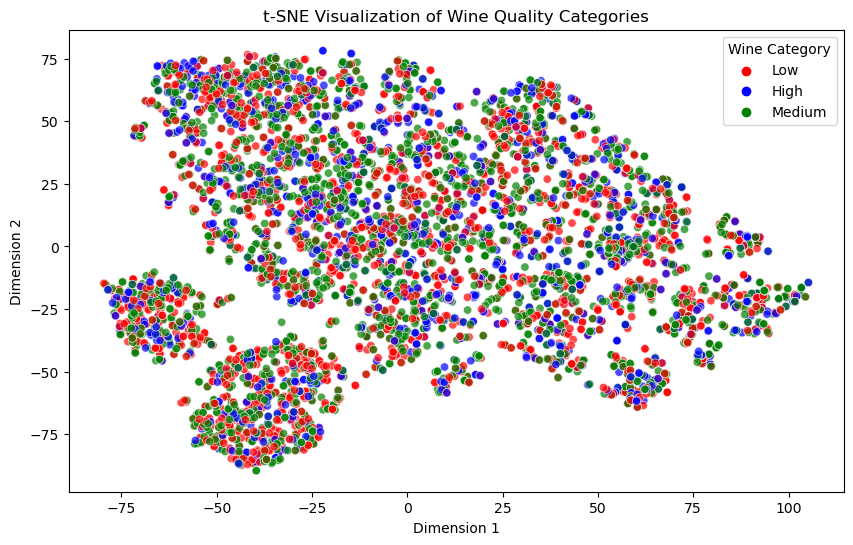

In [55]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['wine_category'] = y_categorical
palette = {'Low': 'red', 'Medium': 'green', 'High': 'blue'}
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='wine_category', data=tsne_df, palette=palette, alpha=0.7)
plt.title('t-SNE Visualization of Wine Quality Categories')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Wine Category')
plt.show()


Perplexity: This parameter controls the balance between local and global aspects of the data. Common values range from 5 to 50.
Learning Rate: Adjusting this parameter can help in finding a good representation. Typical values range from 10 to 1000

In [56]:
common_indices = X_scaled.index.intersection(y_categorical.index)

X_scaled = X_scaled.loc[common_indices].reset_index(drop=True)
y_categorical = y_categorical.loc[common_indices].reset_index(drop=True)
assert len(X_scaled) == len(y_categorical), "X_scaled and y_categorical do not have the same length!"

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

silhouette_avg = silhouette_score(X_tsne, y_categorical)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: -0.015948381274938583


Visual Evaluation: The t-SNE plot shows how the wines are distributed in a 2D space, with colors representing different categories ("Excellent," "Normal," and "Poor"). If "Excellent" and "Poor" wines form distinct clusters, t-SNE has successfully highlighted the differences in their physicochemical properties.

Silhouette Score: This score measures how similar each wine is to its own category compared to other categories. A higher silhouette score indicates better separation, with a score close to 1 suggesting well-separated clusters.

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_tsne = kmeans.fit_predict(X_tsne)

silhouette_tsne = silhouette_score(X_tsne, labels_tsne)
print(f"t-SNE Silhouette Score: {silhouette_tsne:.4f}")


t-SNE Silhouette Score: 0.4448


task2:

In [58]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

wine_data = pd.concat([red_wine, white_wine], ignore_index=True)


In [59]:
print(wine_data.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [60]:
missing_values_wine = wine_data.isnull().sum()
print("Number of missing values in each feature in wine table:")
print(missing_values_wine)

Number of missing values in each feature in wine table:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


preprocessing:

Label Encoding: Convert the categorical label (wine_type) into numerical for model training.

Scaling: Feature scaling ensures that all features contribute equally to the model

In [61]:
label_encoder = LabelEncoder()
wine_data['wine_type'] = label_encoder.fit_transform(wine_data['wine_type'])

X = wine_data.drop('wine_type', axis=1)
y = wine_data['wine_type']

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns).reset_index(drop=True)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns).reset_index(drop=True)


Interaction features can capture the combined effects of two or more features that might influence the distinction between red and white wines. For instance

In [65]:
wine_data['alcohol_density'] = wine_data['alcohol'] * wine_data['density']
wine_data['volatile_acidity_sulfur'] = wine_data['volatile acidity'] * wine_data['total sulfur dioxide']

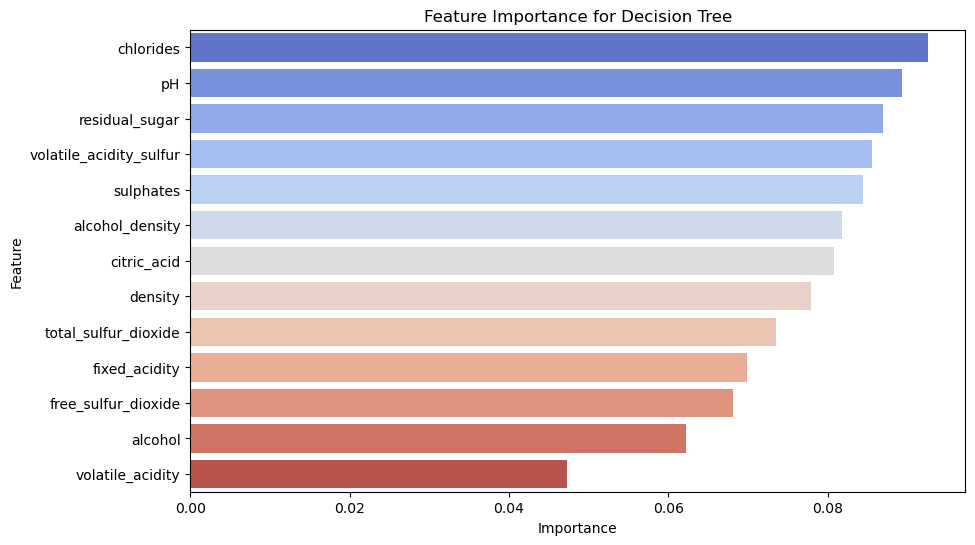

Top selected features: Index(['chlorides'], dtype='object')
Decision Tree Accuracy with Selected Features: 0.40758579169175196
Original Decision Tree Accuracy: 0.3485851896447923


In [66]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train) 
importance_dt = pd.Series(dt.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_dt.values, y=importance_dt.index, palette='coolwarm')
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

top_features = importance_dt.head(1).index
print(f"Top selected features: {top_features}")
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]
dt_reduced = DecisionTreeClassifier(random_state=42)
dt_reduced.fit(X_train_selected, y_train)
y_pred_dt_reduced = dt_reduced.predict(X_test_selected)
accuracy_dt_reduced = accuracy_score(y_test, y_pred_dt_reduced)
print("Decision Tree Accuracy with Selected Features:", accuracy_dt_reduced)
y_pred_dt = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Original Decision Tree Accuracy:", accuracy_dt)


In [67]:
y_pred_dt = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Original Decision Tree Accuracy:", accuracy_dt)

Original Decision Tree Accuracy: 0.3485851896447923


In [68]:
print("\nConfusion Matrix for Decision Tree Model:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report for Decision Tree Model:")
print(classification_report(y_test, y_pred_dt, target_names=[str(i) for i in range(1, 8)], zero_division=0))

print("\nConfusion Matrix for Decision Tree Model with Selected Features:")
print(confusion_matrix(y_test, y_pred_dt_reduced))

print("\nClassification Report for Decision Tree Model with Selected Features:")
print(classification_report(y_test, y_pred_dt_reduced, target_names=[str(i) for i in range(1, 8)], zero_division=0))



Confusion Matrix for Decision Tree Model:
[[  0   0   1   1   1   0   0]
 [  0   1  17  18   7   2   0]
 [  3  16 201 213  95  12   0]
 [  5  29 264 314 110  20   1]
 [  5  20  97  93  59   6   2]
 [  0   2  13  20   8   4   0]
 [  0   0   1   0   0   0   0]]

Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.01      0.02      0.02        45
           3       0.34      0.37      0.35       540
           4       0.48      0.42      0.45       743
           5       0.21      0.21      0.21       282
           6       0.09      0.09      0.09        47
           7       0.00      0.00      0.00         1

    accuracy                           0.35      1661
   macro avg       0.16      0.16      0.16      1661
weighted avg       0.36      0.35      0.35      1661


Confusion Matrix for Decision Tree Model with Selected Features:
[[  0   0   0   3   0   0   

Feature Selection:
i selected the top feature based on feature importance, which can help simplify the model and reduce the risk of overfitting. However, if too many features are removed, important information might be lost, leading to reduced accuracy.
i will Consider keeping more than one feature. Instead of just using the top 1 feature, i could use the top 2-5 features and compare the performance.

Using GridSearchCV or RandomizedSearchCV to find the optimal hyperparameters for my Decision Tree model. Tuning these parameters can help balance the model's bias-variance tradeoff.

Implementing k-fold cross-validation to get a more reliable estimate of the model's performance and to avoid overfitting to a particular train-test split.

Feature Distributions: We can compare the distributions of each feature between the red and white wine groups.
Feature Importance: We can analyze the importance of each feature in distinguishing between red and white wine using models like Decision Tree or Random Forest.
Statistical Testing: We can conduct statistical tests to see if the means of features are significantly different between the red and white wine groups

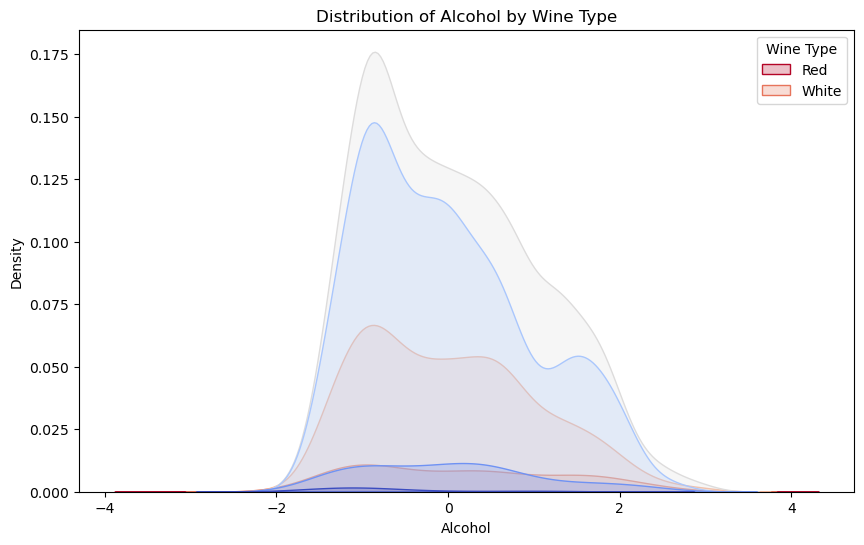

In [69]:
X_train_combined = X_train.copy()
X_train_combined['wine_type'] = y_train 

plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_train_combined, x="alcohol", hue='wine_type', fill=True, palette='coolwarm')
plt.title('Distribution of Alcohol by Wine Type')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend(title='Wine Type', labels=['Red', 'White'])
plt.show()


we'll examine the feature importance from the Decision Tree model that was trained to classify red and white wines. This quantitative measure indicates how influential each feature is in distinguishing between the two groups.

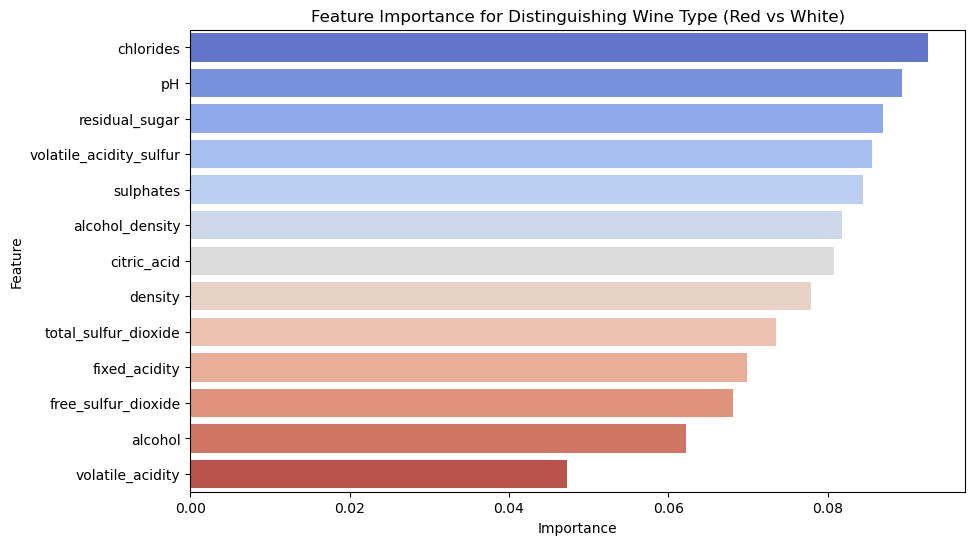

Top Features Distinguishing Red and White Wine:
chlorides                  0.092599
pH                         0.089254
residual_sugar             0.086869
volatile_acidity_sulfur    0.085556
sulphates                  0.084398
dtype: float64


In [70]:
importance_dt = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_dt.values, y=importance_dt.index, palette='coolwarm')
plt.title('Feature Importance for Distinguishing Wine Type (Red vs White)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("Top Features Distinguishing Red and White Wine:")
print(importance_dt.head())


Alcohol Distribution by Wine Type:
Alcohol Content: The distribution plot shows that white wines generally have a higher alcohol content compared to red wines. This is evident from the peak in the density plot for white wines being to the right of that for red wines. However, there is significant overlap between the two distributions, indicating that alcohol content alone might not be a strong distinguishing feature between red and white wines.
Feature Importance for Distinguishing Wine Types:
Chlorides: This feature appears to be the most significant in distinguishing between red and white wines. It suggests that chlorides, which can influence the saltiness and stability of wine, vary significantly between the two wine types.
pH: The pH level is also a key differentiator. Since pH measures the acidity of wine, this suggests that red and white wines have notable differences in their acidity levels.
Residual Sugar: This feature ranks highly in importance, indicating that the sugar content after fermentation differs between red and white wines, likely contributing to their sweetness profile.
Volatile Acidity & Sulfur Compounds: Both volatile acidity and sulfur dioxide compounds (free and total) are critical features, affecting the preservation and aroma of the wines, which may vary between red and white types.
Unique Features per Wine Group:
From the feature importance plot:

Chlorides and pH seem to be the most unique features distinguishing white wines from red wines.
Residual Sugar and Volatile Acidity also play important roles in differentiating the wines but with some overlap.
Alcohol Density (an interaction term between alcohol and density) and sulphates are also significant, suggesting that these engineered features help capture more complex relationships between the physicochemical properties and the wine types.
In summary, while many features contribute to distinguishing between red and white wines, chlorides and pH stand out as particularly unique to each wine group, followed by residual sugar and volatile acidity sulfer. 
